In [51]:
import os
import sys
import pandas as pd
import numpy as np
import json
import time
import datetime
import xml.etree.ElementTree as ET
import pathlib
import json
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder


In [2]:
pathToMetaData = './chronopress_metadata/'
pathToArticles = './ch/'

idOfArticles = []

for filename in os.listdir(pathToMetaData):
    with open(pathToMetaData + filename, 'rb') as json_file:
        data = json.load(json_file)
        if data['metadata'][0]['value'] == "Żołnierz Wolności":
            idOfArticles.append(os.path.splitext(filename)[0]) # pozbycie sie rozszerzenia pliku



In [3]:
stopList =['ach', 'aj', 'albo', 'bardzo', 'bez', 'bo', 'być', 'ci', 'cię', 'ciebie', 'co', 'czy', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokąd', 'dość', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dziś', 'dzisiaj', 'gdyby', 'gdzie', 'go', 'ich', 'ile', 'im', 'inny', 'ja', 'ją', 'jak', 'często', 'rok', 'mieć', 'jakby', 'jaki', 'je', 'jeden', 'jedna', 'jedno', 'jego', 'jej', 'jemu', 'jeśli', 'jest', 'jestem', 'jeżeli', 'już', 'każdy', 'kiedy', 'kierunku', 'kto', 'ku', 'lub', 'ma', 'mają', 'mam', 'mi', 'mną', 'mnie', 'moi', 'mój', 'moja', 'moje', 'może', 'mu', 'my', 'na', 'nam', 'nami', 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'natychmiast', 'nią', 'nic', 'nich', 'nie', 'niego', 'niej', 'niemu', 'nigdy', 'nim', 'nimi', 'niż', 'obok', 'od', 'około', 'on', 'ona', 'one', 'oni', 'ono', 'owszem', 'po', 'pod', 'ponieważ', 'przed', 'przedtem', 'są', 'sam', 'sama', 'się', 'skąd', 'tak', 'taki', 'tam', 'ten', 'to', 'tobą', 'tobie', 'tu', 'tutaj', 'twoi', 'twój', 'twoja', 'twoje', 'ty', 'wam', 'wami', 'was', 'wasi', 'wasz', 'wasza', 'wasze', 'we', 'więc', 'wszystko', 'wtedy', 'wy', 'żaden', 'zawsze', 'że', 'a','aby','ach','acz','aczkolwiek','aj','albo','ale','alez','ależ','ani','az','aż','bardziej','bardzo','beda','bedzie','bez','beda','będą','bede','będę','będzie','bo','bowiem','by','byc','być','byl','byla','byli','bylo','byly','był','była','było','były','bynajmniej','cala','cali','caly','cała','cały','ci','cie','ciebie','cię','co','cokolwiek','cos','coś','czasami','czasem','czemu','czy','czyli','daleko','dla','dlaczego','dlatego','do','dobrze','dokad','dokąd','dosc','dość','duzo','dużo','dwa','dwaj','dwie','dwoje','dzis','dzisiaj','dziś','gdy','gdyby','gdyz','gdyż','gdzie','gdziekolwiek','gdzies','gdzieś','go','i','ich','ile','im','inna','inne','inny','innych','iz','iż','ja','jak','jakas','jakaś','jakby','jaki','jakichs','jakichś','jakie','jakis','jakiś','jakiz','jakiż','jakkolwiek','jako','jakos','jakoś','ją','je','jeden','jedna','jednak','jednakze','jednakże','jedno','jego','jej','jemu','jesli','jest','jestem','jeszcze','jeśli','jezeli','jeżeli','juz','już','kazdy','każdy','kiedy','kilka','kims','kimś','kto','ktokolwiek','ktora','ktore','ktorego','ktorej','ktory','ktorych','ktorym','ktorzy','ktos','ktoś','która','które','którego','której','który','których','którym','którzy','ku','lat','lecz','lub','ma','mają','mało','mam','mi','miedzy','między','mimo','mna','mną','mnie','moga','mogą','moi','moim','moj','moja','moje','moze','mozliwe','mozna','może','możliwe','można','mój','mu','musi','my','na','nad','nam','nami','nas','nasi','nasz','nasza','nasze','naszego','naszych','natomiast','natychmiast','nawet','nia','nią','nic','nich','nie','niech','niego','niej','niemu','nigdy','nim','nimi','niz','niż','no','o','obok','od','około','on','ona','one','oni','ono','oraz','oto','owszem','pan','pana','pani','po','pod','podczas','pomimo','ponad','poniewaz','ponieważ','powinien','powinna','powinni','powinno','poza','prawie','przeciez','przecież','przed','przede','przedtem','przez','przy','roku','rowniez','również','sam','sama','są','sie','się','skad','skąd','soba','sobą','sobie','sposob','sposób','swoje', 'swój','ta','tak','taka','taki','takie','takze','także','tam','te','tego','tej','ten','teraz','też','to','toba','tobą','tobie','totez','toteż','totobą','trzeba','tu','tutaj','twoi','twoim','twoj','twoja','twoje','twój','twym','ty','tych','tylko','tym','u','w','wam','wami','was','wasz','wasza','wasze','we','według','wiele','wielu','więc','więcej','wlasnie','właśnie','wszyscy','wszystkich','wszystkie','wszystkim','wszystko','wtedy','wy','z','za','zaden','zadna','zadne','zadnych','zapewne','zawsze','ze','zeby','zeznowu','z','ów','znow','znowu','znów','zostal','został','żaden','żadna','żadne','żadnych','że','żeby']


In [4]:
data = []

for idOfArticle in idOfArticles:
    entry = {}
    entry['id'] = idOfArticle
    rawText = ""
    tree = ET.parse(pathToArticles + idOfArticle + ".txt")
    root = tree.getroot()
    for chunk in root:
        for sentence in chunk:
            for token in sentence.findall('tok'):
                rawText += " " + token.findall('orth')[0].text
    entry['raw_text'] = rawText
    data.append(entry)

textsDataFrame = pd.DataFrame(data)

In [5]:
len(data)

2556

In [6]:
lemmatizedTexts = []

for idOfArticle in textsDataFrame['id'].values:
    tree = ET.parse(pathToArticles + idOfArticle + ".txt")
    root = tree.getroot()
    lemmatizedWords = []
    for chunk in root:
        for sentence in chunk:
            for token in sentence.findall('tok'):
                lemmatized = token.findall('lex')[0][0].text
                if lemmatized.isalpha() and lemmatized not in stopList:
                    lemmatizedWords.append(lemmatized)
    lemmatizedTexts.append(lemmatizedWords)

textsDataFrame['lemmatized'] = lemmatizedTexts

In [7]:
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(textsDataFrame['lemmatized'])
finder.apply_freq_filter(5)
set_dict = set(finder.nbest(bigram_measures.pmi,32100)[100:])
documents = textsDataFrame['lemmatized']
bigrams = []
for doc in documents:
    entry = ['_'.join([word_first, word_second])
             for word_first, word_second in zip(doc[:-1],doc[1:])
             if (word_first, word_second) in set_dict]
    bigrams.append(entry)
textsDataFrame['bigram'] = bigrams

In [8]:
from collections import Counter

def vowpalize_sequence(sequence):
    word_2_frequency = Counter(sequence)
    del word_2_frequency['']
    vw_string = ''
    for word in word_2_frequency:
        vw_string += word + ":" + str(word_2_frequency[word]) + ' '
    return vw_string

In [9]:
vw_text = []
for index, data in textsDataFrame.iterrows():
    vw_string = ''    
    doc_id = data.id
    lemmatized = '@lemmatized ' + vowpalize_sequence(data.lemmatized)
    bigram = '@bigram ' + vowpalize_sequence(data.bigram)
    vw_string = ' |'.join([doc_id, lemmatized, bigram])
    vw_text.append(vw_string)
textsDataFrame['vw_text'] = vw_text

In [10]:
textsDataFrame['vw_text'].head().values[0]




'f0a7797a-365f-4970-ba6f-ce5881db0c1b |@lemmatized wśród:1 długotrwały:1 oklask:1 przewodniczyć:1 komitet:3 międzynarodowy:2 nagroda:3 stalinowski:3 Dymitr:1 skobielcyn:1 wręczyć:1 jorge:2 amado:4 dyplom:1 laureat:2 złoty:1 medal:1 serdeczny:1 gratulacja:1 złożyć:1 następnie:1 przewodniczący:1 radziecki:8 obrońca:1 pokój:4 Mikołaj:1 tichonow:1 sekretarz:1 zarząd:1 związek:5 pisarz:1 Anatol:1 safronow:1 wiceprzewodniczący:1 antyfaszystowski:1 młodzież:1 konstanta:1 Orłowo:1 kolej:1 głos:1 zabrać:1 stwierdzać:1 przyznać:1 uważać:1 wielki:1 zaszczyt:1 naród:6 brazylijski:3 powiedzieć:1 walczyć:2 kochać:1 wiedzieć:2 zwycięstwo:1 faszyzm:1 zawdzięczać:1 świat:1 człowiek:2 daleki:1 ciąg:1 przemówienie:1 J:1 scharakteryzować:1 walka:1 przeciwko:3 zakusy:1 podżegacz:1 wojenny:2 milion:2 Brazylijczyk:3 stwierdzić:1 mówca:1 podpisać:1 apel:1 światowy:1 rada:1 nienawidzieć:1 wojna:2 dopuszczać:1 myśleć:1 kraj:6 demokracja:3 ludowy:3 zapytywać:1 eksploatować:1 poniże:1 doprowadzać:2 nędza:1 usiłow

In [11]:
textsDataFrame[['id','raw_text', 'vw_text']].to_csv('./wwzd.csv')


In [12]:
from topicnet.cooking_machine import Dataset

demo_data = Dataset('wwzd.csv', batch_vectorizer_path="./wwzd_batches")

In [13]:
demo_data._cached_dict = demo_data.get_dictionary().filter(min_df=5.0, min_tf=5.0, max_df_rate=0.9)


In [14]:
demo_data.get_dataset().head()


,Unnamed: 0,raw_text,vw_text
id,,,
f0a7797a-365f-4970-ba6f-ce5881db0c1b,0,"Wśród długotrwałych oklasków , przewodniczący...",f0a7797a-365f-4970-ba6f-ce5881db0c1b |@lemmati...
916d75b3-c01f-43a6-8df5-b842c46de999,1,Genewa ( PAP ) . W poniedziałek przybył do Ge...,916d75b3-c01f-43a6-8df5-b842c46de999 |@lemmati...
a5a6af87-ccbc-4999-8655-77c650b04915,2,USA bezwstydnie łamią zobowiązania międzynaro...,a5a6af87-ccbc-4999-8655-77c650b04915 |@lemmati...
909adfe9-4b16-4615-ab20-410a6e1ffec7,3,Niedaleko Stalingradu ujrzał em po raz pierws...,909adfe9-4b16-4615-ab20-410a6e1ffec7 |@lemmati...
8abdbcb0-9d91-4f55-8091-719ce6fa09e6,4,Dokładna obsługa wozu po dniu pracy gwarantuj...,8abdbcb0-9d91-4f55-8091-719ce6fa09e6 |@lemmati...


In [15]:
from topicnet.cooking_machine.model_constructor import init_simple_default_model

model_artm = init_simple_default_model(
    dataset=demo_data,
    modalities_to_use={'@lemmatized': 1.0, '@bigram': 0.5},
    main_modality='@lemmatized',
    specific_topics=15,
    background_topics=1,
)

model_artm.scores

[PerplexityScore@all, SparsityThetaScore, SparsityPhiScore@lemmatized, PerplexityScore@lemmatized, TopicKernel@lemmatized, SparsityPhiScore@bigram, PerplexityScore@bigram, TopicKernel@bigram]

In [16]:
from topicnet.cooking_machine.models.topic_model import TopicModel
from topicnet.cooking_machine.experiment import Experiment


In [17]:
tm = TopicModel(model_artm)

In [18]:
specific_topics = [t for t in tm.topic_names if "background" not in t]

In [19]:
model_artm.regularizers

[smooth_phi_bcg, smooth_theta_bcg]

In [20]:
model_artm.scores

[PerplexityScore@all, SparsityThetaScore, SparsityPhiScore@lemmatized, PerplexityScore@lemmatized, TopicKernel@lemmatized, SparsityPhiScore@bigram, PerplexityScore@bigram, TopicKernel@bigram]

In [21]:
experiment = Experiment(experiment_id="experiment2", save_path="experiments", topic_model=tm)

In [22]:

from topicnet.cooking_machine.cubes import CubeCreator, RegularizersModifierCube, PerplexityStrategy, GreedyStrategy
import artm


In [23]:

cube = RegularizersModifierCube(
    num_iter=10,
    regularizer_parameters=[
        {
            'regularizer': artm.DecorrelatorPhiRegularizer(name='decorrelation_phi', 
                                                           class_ids="@lemmatized", 
                                                           topic_names=specific_topics),
            'tau_grid': [0, 0.005, 0.01, 0.015, 0.02, 0.025]

        },
        {
            'regularizer': artm.SmoothSparsePhiRegularizer(name="smsp_phi_specific",
                                                           class_ids="@lemmatized", 
                                                           topic_names=specific_topics),
            'tau_grid': [-0.05, 0, 0.05]
        },
        {
            'name': "smooth_phi_bcg",
            'tau_grid': [0.1]
        },
    ],
    verbose=True
)
cube(tm, demo_data)

100%|██████████| 18/18 [01:48<00:00,  6.02s/it]


In [24]:

import matplotlib.pyplot as plt
%matplotlib inline

from topicnet.cooking_machine.pretty_output import make_notebook_pretty
make_notebook_pretty()

In [25]:
experiment.show()


Experiment experiment2

Experiment was made with BigARTM 0.10.0
Tree:
                              ┌##13h15m52s_08d12m2019y###
                              ├##13h15m58s_08d12m2019y###
                              ├##13h16m05s_08d12m2019y###
                              ├##13h16m11s_08d12m2019y###
                              ├##13h16m17s_08d12m2019y###
                              ├##13h16m24s_08d12m2019y###
                              ├##13h16m30s_08d12m2019y###
                              ├##13h16m36s_08d12m2019y###
                              ├##13h16m41s_08d12m2019y###
<<<<<<<<<<<root>>>>>>>>>>>────┤
                              ├##13h16m46s_08d12m2019y###
                              ├##13h16m51s_08d12m2019y###
                              ├##13h16m57s_08d12m2019y###
                              ├##13h17m03s_08d12m2019y###
                              ├##13h17m09s_08d12m2019y###
                              ├##13h17m15s_08d12m2019y###
                            

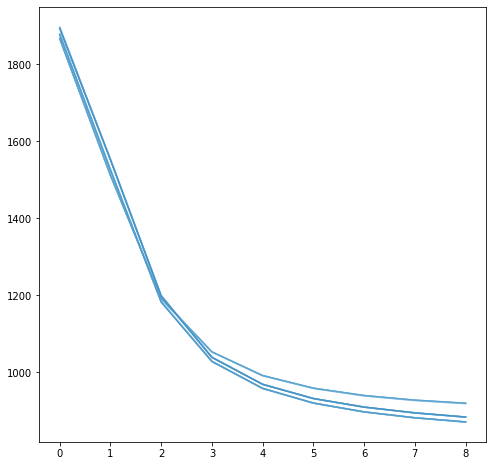

In [26]:
from matplotlib import cm
import numpy as np


tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['PerplexityScore@all']
    plt.plot(score[1:], color=cm.Blues(colors[i]))
plt.show()

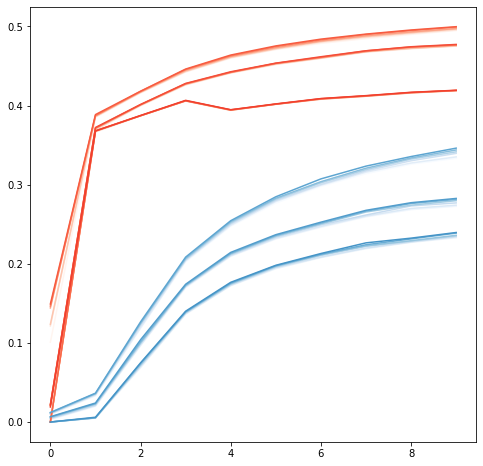

In [27]:
from matplotlib import cm
import numpy as np


tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['TopicKernel@lemmatized.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]))
    score = tm.scores['TopicKernel@lemmatized.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]))
plt.show()

In [28]:
query = (
    "TopicKernel@lemmatized.average_contrast > 0.7 * MAXIMUM(TopicKernel@lemmatized.average_contrast) "
    "and TopicKernel@lemmatized.average_purity > 0.7 * MAXIMUM(TopicKernel@lemmatized.average_purity) "
    "and PerplexityScore@all < 1.1 * MINIMUM(PerplexityScore@all) "
)
models = experiment.select(query)

models = experiment.select(query + " COLLECT all")
print(len(models))

/home/tomasz/.local/lib/python3.7/site-packages/topicnet/cooking_machine/routine.py:528: UserWarning: Can't return the requested number of models:  "18". Only "12" satisfy the query
  W_RETURN_FEWER_MODELS_DETAILS.format(models_num, len(result_models)))


12


In [29]:
def describe_model(model):
    for reg_name, reg in model.regularizers._data.items():
        print(reg_name, reg.tau)
    print(model.scores["PerplexityScore@all"][-1])
    print(model.scores["TopicKernel@lemmatized.average_contrast"][-1])
    print(model.scores["TopicKernel@lemmatized.average_purity"][-1])
    print("------")

In [30]:
for model in models:
    describe_model(model)

smooth_phi_bcg 5.990796019900498
smooth_theta_bcg 0.0
decorrelation_phi 0
smsp_phi_specific -0.17116560056858565
918.5167236328125
0.49480223655700684
0.33337050676345825
------
smooth_phi_bcg 5.990796019900498
smooth_theta_bcg 0.0
decorrelation_phi 0
smsp_phi_specific 0.0
871.0945434570312
0.475146621465683
0.27273276448249817
------
smooth_phi_bcg 5.990796019900498
smooth_theta_bcg 0.0
decorrelation_phi 0.005
smsp_phi_specific -0.17116560056858565
918.7820434570312
0.4955748915672302
0.33513960242271423
------
smooth_phi_bcg 5.990796019900498
smooth_theta_bcg 0.0
decorrelation_phi 0.005
smsp_phi_specific 0.0
871.1011352539062
0.47526609897613525
0.2741016149520874
------
smooth_phi_bcg 5.990796019900498
smooth_theta_bcg 0.0
decorrelation_phi 0.01
smsp_phi_specific -0.17116560056858565
918.9403076171875
0.49679121375083923
0.33956313133239746
------
smooth_phi_bcg 5.990796019900498
smooth_theta_bcg 0.0
decorrelation_phi 0.01
smsp_phi_specific 0.0
871.1339721679688
0.4755915105342865
0

In [31]:
query = (
    "TopicKernel@lemmatized.average_contrast > 0.7 * MAXIMUM(TopicKernel@lemmatized.average_contrast) "
    "and TopicKernel@lemmatized.average_purity > 0.7 * MAXIMUM(TopicKernel@lemmatized.average_purity) "
    "and PerplexityScore@all < 1.1 * MINIMUM(PerplexityScore@all) "
    "and TopicKernel@lemmatized.average_purity -> max"    
)

models = experiment.select(query + " COLLECT 2")
print(len(models))

2


In [32]:
last_model = models[-1]


In [33]:

from topicnet.viewers.top_tokens_viewer import TopTokensViewer
from topicnet.viewers.top_documents_viewer import TopDocumentsViewer

In [34]:
thresh = 1e-5
last_model_top_tok = TopTokensViewer(last_model, num_top_tokens=10, method='phi')
last_model_html = last_model_top_tok.to_html(last_model_top_tok.view(),thresh=thresh)

In [35]:
last_model_top_doc = TopDocumentsViewer(last_model, dataset=demo_data).view()


In [36]:
from IPython.display import display, display_html


In [37]:

n=7
for line, topic_docs in list(zip(last_model_html, last_model_top_doc))[:n]:
    display_html(line, raw=True)
    display(topic_docs)

,topic_0 @bigram
organizacja_partyjny,0.05714
członek_Partia,0.03568
kandydat_Partia,0.01091
ZMP_owca,0.01052
wydział_polityczny,0.01044
praca_polityczny,0.00975
sprawozdawczo_wyborczy,0.00881
podstawowy_organizacja,0.00824
oddziałowy_organizacja,0.00811
członek_kandydat,0.00742


['a601b92b-ad7f-4520-b38c-fd95808677fd',
 '319951df-295d-4006-86dc-e727d3aa527e',
 'dacf0686-a7e9-4561-9262-413140274424',
 '4b7da405-997a-417e-b570-668ea4da8e36',
 '24435746-b838-4af3-8a55-f77d581c0f8c',
 'b39a2b8f-ec34-460b-b373-77b7e1caf874',
 'c61e4218-ff6a-4ab5-91c2-84b4ea2907f9',
 '015b48b2-7fd1-41cb-95c0-3533147cf3f6',
 'ad204465-f97f-4513-adc5-f86ce14581af',
 '970930ca-054d-475d-9fdc-b18cf1a05ea0']

,topic_1 @bigram
spółdzielnia_produkcyjny,0.03393
front_narodowy,0.01811
plan_letni,0.01418
klasa_robotniczy,0.01113
człowiek_praca,0.00968
władza_ludowy,0.00915
naród_polski,0.00815
Bolesław_Bierut,0.00761
Polska_ludowy,0.00753
członek_spółdzielnia,0.0074


['939b1be9-b903-47bf-98f8-85e9bd2b0e1a',
 'f6ca8fc7-5fa6-4f5e-82c0-4d9e73e049e4',
 '872d3b41-8ebe-4c7e-9fa1-879b0ce3ea93',
 '18dbbff0-b0e5-4b75-98e0-4f25a853665e',
 '812c22df-b4b2-4f7c-b313-f75a460346af',
 'f0167fc1-0676-4b17-b2a2-a1da999f84a0',
 '0f1ec3ba-3e8c-4b54-a8ec-dfa6f6a744e6',
 'c2e61a50-99a2-4bd4-90e4-214f3c458f2e',
 '15e5ec9b-f374-4182-abe0-8ac840f03764',
 '9ed49307-0c45-44a1-b557-fd3a9f9fc2c9']

,topic_2 @bigram
Niemcy_zachodni,0.02847
naród_niemiecki,0.0198
republika_demokratyczny,0.01595
niemiecki_republika,0.01508
imperialista_amerykański,0.01139
wojna_światowy,0.01064
miłować_pokój,0.01055
nowy_wojna,0.01014
podżegacz_wojenny,0.00883
masa_pracować,0.00869


['db377984-90b3-4130-8c8a-400980688a32',
 '0187c9f4-b119-4b59-9ae8-d9cbc514d698',
 'a36d8435-44a1-4bbd-80c9-84dcd933ac72',
 'c14a597a-3b18-4f3d-9a62-3a32e6365976',
 '23c6c42c-ef4c-4c91-bf71-f39cf24640f6',
 '91249733-1757-4fc4-8533-cbc35e623dbe',
 '95c3317c-d33a-4d35-ae94-223489720454',
 '6b5d2d81-c290-4c1f-bc3a-d8716badfc3a',
 'da31aadf-10ea-46c7-bf0a-a0ff7a7753be',
 'f7fe6dba-e780-416d-b970-17ef5e8171e9']

,topic_3 @bigram
walka_pokój,0.02492
obrońca_pokój,0.01919
obrona_pokój,0.01572
milion_człowiek,0.00974
rada_pokój,0.00929
wszystek_kraj,0.00908
światowy_rada,0.00882
nagroda_stalinowski,0.00848
setka_milion,0.00825
światowy_kongres,0.00811


['00a2b90d-fde7-413b-8957-e2ceb1b7f287',
 '28974d56-c388-4b9e-bd0e-4bf026fc23af',
 '548fb2b8-561c-48d9-b007-71e37e08ae93',
 'c890994d-8079-47de-b408-6547ec61b7fe',
 '1db7dfda-64a5-4081-80b1-c5c1e3317e38',
 'e7b77b09-bb8f-424a-a118-25f91a0ed51f',
 '53f5979b-e64c-4ed8-be48-9979383f704f',
 'bffa13d8-7d65-41fc-b05a-904b5cc13cd4',
 '76c4938a-022c-4500-8341-bde775f89fab',
 '97b102e1-edaa-4f76-ad8c-e86414e6570a']

,topic_4 @bigram
przodownik_praca,0.02259
nowy_huta,0.01953
M_inaczej,0.01074
proca_norma,0.00984
wykonać_plan,0.00911
wielki_piec,0.00713
zakład_praca,0.00709
wydajność_praca,0.00659
zakład_przemysł,0.00647
plan_letni,0.00636


['2e14b709-1c86-4a41-875d-186aacbce0fe',
 '42e16674-6391-426a-bf9f-1968f2f4782d',
 '32444e73-34e4-4e48-8dfa-aeba2dd7b684',
 '5c595858-c362-4270-8141-67c67af68c5c',
 'a51489d1-fe54-4238-bf7f-dc1fd7c38bda',
 'fe3902ab-5767-486e-bd1e-c3a64441b538',
 'c0666c07-cf9e-4155-9d62-dfb5ab501856',
 '17a9d6c8-ddb3-436a-9a0d-b573b5f8d48c',
 '278a9cdd-a00d-4a71-8d43-3e385901ac3d',
 '8da3a5da-69b1-4d1e-b196-c3bdaa61de15']

,topic_5 @bigram
zespół_artystyczny,0.01808
obóz_letni,0.01257
oficer_podoficer,0.01158
wóz_bojowy,0.00832
zajęcia_taktyczny,0.00827
sprzęt_bojowy,0.0074
pole_walka,0.00733
przyjaźń_Polska,0.00722
Polska_radziecki,0.00683
wysoki_poziom,0.00636


['a42a1fce-bb10-40af-bc2e-b6d0af9fb466',
 'a1ea6ca8-f6e5-42a9-8f7e-2f3e0c854546',
 'af12566d-773a-4f96-ae71-ee23762792d5',
 '2accfe5b-6836-4f0f-b639-cd23631a9368',
 '49fcecd2-0c46-4481-a8c8-e549d0c2fef1',
 'a2b3c7a1-36db-4fb8-8cb7-109dd3e04ce1',
 '37f92167-d554-4bc3-92dc-902c4ec79215',
 'f9a9b0bf-0640-426c-a3e9-5968d5bdc5ea',
 'd798e1e1-5a1f-46e6-abeb-774d08ccb1e0',
 '7f4a25ab-653c-4c0e-b740-3125538da0a1']

,topic_6 @bigram
związek_radziecki,0.05497
armia_radziecki,0.02499
naród_polski,0.02074
naród_radziecki,0.01503
towarzysz_Stalin,0.0119
Partia_komunistyczny,0.00943
klasa_robotniczy,0.00932
komunistyczny_Partia,0.00887
Lenin_Stalin,0.00771
człowiek_radziecki,0.00765


['2a653a5a-da72-4bb9-b852-9b3c54b5af4d',
 '25ac62c0-03ff-481c-a292-94e5d60ad2d0',
 'b6145d25-661c-4a0b-b81d-4ede2d2e1edf',
 'b4052a34-86a2-4fb6-954f-11644952fc00',
 '117afb37-9172-4703-8861-0391636133cf',
 'b8ffd08c-2c88-47a9-9db7-266895c9cc88',
 'cc4bd2b2-7a55-4096-9883-b51caaf33ba1',
 'ac487620-8b73-4d4f-b1e3-6cdaeb282057',
 'bff60e70-d2f8-478f-9e4f-504075a473e4',
 'f2d9e28e-7e04-4be8-84ae-f87859e3d89d']

In [38]:

display_html(last_model_html[-1], raw=True)
    
topic_docs = last_model_top_doc[-1]
topic_docs = [str(topic) for topic in topic_docs]
for doc_id in topic_docs:
    print(doc_id)

,background_15 @bigram
metr_sześcienny,0.00122
lewy_brzeg,0.00074
dom_dziecko,0.00066
zadawać_siebie,0.00064
człowiek_pracować,0.00062
kilkanaście_minuta,0.0006
wszystek_strona,0.00059
podejść_blisko,0.00059
godzina_rano,0.00058
poszukiwanie_praca,0.00058


cb899d8d-3001-49a9-a1bd-891e038a0e19
17500512-9a92-4f7e-bc81-1ce790a37ccc
0e3da76d-8f1c-49ed-af35-78378189be73
c30b55fd-0817-49fe-8e81-088068f1827a
c00aea82-3ce0-464a-ba72-5f7725016e8a
4aac8267-67c1-44be-a543-db2a2fab724a
e0642cf4-ff98-40ec-84ca-ed10d02e6e23
76cc6841-2010-4bb8-9a9e-228eac739a32
009eed78-2757-4b59-bff4-e4ff03832842
a96799c9-9d8c-4a7f-be2b-f4fdd4ce614f


In [39]:
theta_cube = RegularizersModifierCube(
    num_iter=10,
    regularizer_parameters=[
        {
            'regularizer': artm.SmoothSparseThetaRegularizer(name="smsp_theta_specific",
                                                           topic_names=specific_topics),
            'tau_grid': [-0.05, -0.01]
        },
        {
            'name': "smooth_theta_bcg",
            'tau_grid': [0.01, 0.1]
        },
    ],
    verbose=True
)
theta_cube(models, demo_data)

experiment.show()

Experiment experiment2

Experiment was made with BigARTM 0.10.0
Tree:
                              ┌##13h15m52s_08d12m2019y###
                              ├##13h15m58s_08d12m2019y###
                              ├##13h16m05s_08d12m2019y###
                              ├##13h16m11s_08d12m2019y###
                              ├##13h16m17s_08d12m2019y###
                              ├##13h16m24s_08d12m2019y###
                              ├##13h16m30s_08d12m2019y###
                              ├##13h16m36s_08d12m2019y###
                              ├##13h16m41s_08d12m2019y###
<<<<<<<<<<<root>>>>>>>>>>>────┤
                              ├##13h16m46s_08d12m2019y###
                              ├##13h16m51s_08d12m2019y###
                              ├##13h16m57s_08d12m2019y###
                              │                                                            ┌##13h18m42s_08d12m2019y###
                              │                                                    

In [40]:
query = (
    "TopicKernel@lemmatized.average_contrast > 0.92 * MAXIMUM(TopicKernel@lemmatized.average_contrast) "
    "and TopicKernel@lemmatized.average_purity > 0.92 * MAXIMUM(TopicKernel@lemmatized.average_purity) "
    "and PerplexityScore@all < 1.1 * MINIMUM(PerplexityScore@all) "
    "and SparsityThetaScore > MEDIAN(SparsityThetaScore)"
)
models = experiment.select(query)

print(len(models))

2


In [41]:
for model in models:
    describe_model(model)

smooth_phi_bcg 5.990796019900498
smooth_theta_bcg 37.68857589984351
decorrelation_phi 0.025
smsp_phi_specific -0.17116560056858565
smsp_theta_specific -1.076816454281243
947.6901245117188
0.48579949140548706
0.3708178997039795
------
smooth_phi_bcg 5.990796019900498
smooth_theta_bcg 37.68857589984351
decorrelation_phi 0.02
smsp_phi_specific -0.17116560056858565
smsp_theta_specific -1.076816454281243
947.5653686523438
0.48541390895843506
0.3692113757133484
------


In [42]:
best_model = models[0]


In [43]:
first_model_top_tok = TopTokensViewer(best_model, num_top_tokens=10, method='phi')
first_model_html =  first_model_top_tok.to_html(first_model_top_tok.view(),thresh=thresh)
first_model_top_doc = TopDocumentsViewer(best_model, dataset=demo_data).view()

In [44]:
from IPython.display import clear_output, display_html

n=14
for line, topic_docs in list(zip(first_model_html, first_model_top_doc))[:n]:
    display_html(line, raw=True)
    display(topic_docs)

,topic_0 @bigram
organizacja_partyjny,0.06384
członek_Partia,0.03993
kandydat_Partia,0.01209
wydział_polityczny,0.01202
ZMP_owca,0.01149
praca_polityczny,0.01014
sprawozdawczo_wyborczy,0.00982
podstawowy_organizacja,0.00916
oddziałowy_organizacja,0.00903
członek_kandydat,0.00826


['dacf0686-a7e9-4561-9262-413140274424',
 'a601b92b-ad7f-4520-b38c-fd95808677fd',
 'ad204465-f97f-4513-adc5-f86ce14581af',
 '970930ca-054d-475d-9fdc-b18cf1a05ea0',
 'e6f1902c-bbec-4806-80f1-3a136fdc870e',
 '3bbde974-942d-4a16-a94e-cb7e115cbbe8',
 '4dd7d372-5e53-4391-86b4-31b2d5ca0941',
 '02f23b0b-48da-4959-8d8f-4a8e035c03fb',
 '015b48b2-7fd1-41cb-95c0-3533147cf3f6',
 '319951df-295d-4006-86dc-e727d3aa527e']

,topic_1 @bigram
spółdzielnia_produkcyjny,0.04692
front_narodowy,0.02493
władza_ludowy,0.01372
członek_spółdzielnia,0.01007
Ziemia_odzyskać,0.00902
rada_narodowy,0.00854
Polska_ludowy,0.00837
Ziemia_zachodni,0.00792
Bolesław_Bierut,0.00775
spółdzielczość_produkcyjny,0.00756


['939b1be9-b903-47bf-98f8-85e9bd2b0e1a',
 'f6ca8fc7-5fa6-4f5e-82c0-4d9e73e049e4',
 '0f1ec3ba-3e8c-4b54-a8ec-dfa6f6a744e6',
 '71636bf7-8167-4ad8-8264-3f561768ad22',
 'b9e4620c-8793-453b-a863-9703cd8fbcc0',
 'c2e61a50-99a2-4bd4-90e4-214f3c458f2e',
 '1b8d7da7-b7cf-479c-a4c9-c86bd0577ec4',
 'f0167fc1-0676-4b17-b2a2-a1da999f84a0',
 '15e5ec9b-f374-4182-abe0-8ac840f03764',
 'a22d6e72-1a38-4f22-a305-59950bb893a6']

,topic_2 @bigram
Niemcy_zachodni,0.04441
naród_niemiecki,0.02378
republika_demokratyczny,0.02019
niemiecki_republika,0.0184
imperialista_amerykański,0.01353
zachodnio_niemiecki,0.01156
nowy_wojna,0.01122
armia_europejski,0.01016
remilitaryzacja_Niemcy,0.00995
wojna_światowy,0.00984


['c14a597a-3b18-4f3d-9a62-3a32e6365976',
 '0187c9f4-b119-4b59-9ae8-d9cbc514d698',
 '6b5d2d81-c290-4c1f-bc3a-d8716badfc3a',
 'db377984-90b3-4130-8c8a-400980688a32',
 'a36d8435-44a1-4bbd-80c9-84dcd933ac72',
 '95c3317c-d33a-4d35-ae94-223489720454',
 'b6341c01-58e0-44ab-9d4b-86fbb2e5f6eb',
 'cd14475a-c988-4788-ab0e-58c12c9d30f2',
 'f193452c-858e-4dca-810d-7293a49000ae',
 '294d733d-0b9d-4f10-8218-fb2cd487a5e0']

,topic_3 @bigram
walka_pokój,0.03272
obrońca_pokój,0.02632
obrona_pokój,0.02028
podżegacz_wojenny,0.01479
kraj_demokracja,0.01207
rada_pokój,0.01196
obóz_pokój,0.01174
milion_człowiek,0.01163
światowy_rada,0.01093
demokracja_ludowy,0.0107


['00a2b90d-fde7-413b-8957-e2ceb1b7f287',
 'c890994d-8079-47de-b408-6547ec61b7fe',
 'e7b77b09-bb8f-424a-a118-25f91a0ed51f',
 '1db7dfda-64a5-4081-80b1-c5c1e3317e38',
 '76c4938a-022c-4500-8341-bde775f89fab',
 '53f5979b-e64c-4ed8-be48-9979383f704f',
 '548fb2b8-561c-48d9-b007-71e37e08ae93',
 '97b102e1-edaa-4f76-ad8c-e86414e6570a',
 '28974d56-c388-4b9e-bd0e-4bf026fc23af',
 '45cb3b3b-a4d5-4946-9b77-064dffec2851']

,topic_4 @bigram
przodownik_praca,0.02488
nowy_huta,0.02427
plan_letni,0.01494
M_inaczej,0.01356
zakład_praca,0.01353
wykonać_plan,0.01332
proca_norma,0.01229
wydajność_praca,0.00944
wielki_piec,0.00884
uczcić_rocznica,0.00841


['2e14b709-1c86-4a41-875d-186aacbce0fe',
 '32444e73-34e4-4e48-8dfa-aeba2dd7b684',
 'fe3902ab-5767-486e-bd1e-c3a64441b538',
 '31686cdc-b751-459b-9446-04db2cbccae3',
 '42e16674-6391-426a-bf9f-1968f2f4782d',
 'c0666c07-cf9e-4155-9d62-dfb5ab501856',
 '0e95538c-955e-45b2-b182-66da41cd8e46',
 'f6ba1b12-a656-454f-924a-4c451019f9a5',
 '278a9cdd-a00d-4a71-8d43-3e385901ac3d',
 '5c595858-c362-4270-8141-67c67af68c5c']

,topic_5 @bigram
zespół_artystyczny,0.02269
oficer_podoficer,0.01561
obóz_letni,0.01532
ćwiczenia_taktyczny,0.01101
wóz_bojowy,0.01027
pole_walka,0.01019
zajęcia_taktyczny,0.00998
sprzęt_bojowy,0.00878
przyjaźń_Polska,0.0081
wysoki_poziom,0.00772


['a42a1fce-bb10-40af-bc2e-b6d0af9fb466',
 '7f4a25ab-653c-4c0e-b740-3125538da0a1',
 'a2b3c7a1-36db-4fb8-8cb7-109dd3e04ce1',
 'a1ea6ca8-f6e5-42a9-8f7e-2f3e0c854546',
 'f9a9b0bf-0640-426c-a3e9-5968d5bdc5ea',
 'bb125cd0-316e-4349-83bf-e8402f97554b',
 'b03ed7cf-26fa-42ab-8c87-0f22d78a7802',
 '49fcecd2-0c46-4481-a8c8-e549d0c2fef1',
 '86dbb1b8-e2b5-4b40-b9c0-58740c054249',
 'c6816745-a64c-49c2-be8f-a4b9837708b4']

,topic_6 @bigram
związek_radziecki,0.05855
klasa_robotniczy,0.02589
armia_radziecki,0.02536
naród_polski,0.02387
naród_radziecki,0.01601
towarzysz_Stalin,0.01232
Partia_komunistyczny,0.01205
komunistyczny_Partia,0.01084
człowiek_radziecki,0.00895
rewolucja_październikowy,0.00841


['b6145d25-661c-4a0b-b81d-4ede2d2e1edf',
 'b8ffd08c-2c88-47a9-9db7-266895c9cc88',
 'f2d9e28e-7e04-4be8-84ae-f87859e3d89d',
 '2a653a5a-da72-4bb9-b852-9b3c54b5af4d',
 '358e9913-b34e-46f3-b9a5-7255cadee690',
 'b4052a34-86a2-4fb6-954f-11644952fc00',
 '25ac62c0-03ff-481c-a292-94e5d60ad2d0',
 'bff60e70-d2f8-478f-9e4f-504075a473e4',
 'cc4bd2b2-7a55-4096-9883-b51caaf33ba1',
 'd27ef5bb-db1a-4642-b251-79b0fcc980dc']

,topic_7 @bigram
wojsko_polski,0.04983
Polska_ludowy,0.0285
ludowy_wojsko,0.02438
naród_polski,0.01732
rzeczpospolita_ludowy,0.01258
polski_rzeczpospolita,0.01255
armia_radziecki,0.01157
ludowy_ojczyzna,0.01037
lud_pracować,0.00848
Bolesław_Bierut,0.00773


['7636ca0b-8f22-4b4e-9a8b-f2363486890e',
 '199097de-b5da-464c-9527-47d6c5bc9fd9',
 '4e354c3e-6996-4d58-bf49-60f61f1d969f',
 '42ce043b-06b1-45bb-918b-35d6630ccada',
 '83e44ae8-9cb0-472c-97b6-45d473eaa4ec',
 '026dbde8-27ba-4609-a7c1-bc9873c8e38e',
 '033aac38-afeb-4632-96e5-84ea6a6b90ca',
 'd9f156a9-bb40-4cac-a544-71301f0f84d7',
 '60fd268d-5696-4439-b4b2-197f3b7054bb',
 'df50391f-d363-416e-862e-725e96052d27']

,topic_8 @bigram
młody_oficer,0.01278
służba_wartowniczy,0.01259
pomoc_naukowy,0.0104
pełnieć_służba,0.01031
Sala_wykładowy,0.00929
dowódca_oddział,0.00755
regulamin_służba,0.00732
szkoła_oficerski,0.00709
służba_wewnętrzny,0.00685
młody_pilot,0.00678


['08d7dbac-da87-41a2-a260-79c946f93cfb',
 '00bfc6f0-e9a2-47b5-b77f-2183893478a6',
 '65ab697e-71b3-4018-8039-a0005cdbe7d9',
 '772bf383-a0e1-4a1a-b17e-ff76341e6e1b',
 '560dec05-e957-4ac8-a045-596d45a504bd',
 'ae3a1b92-efba-4b3a-9dbf-6a59f789a0a3',
 'eb64a5dc-867b-43f2-a242-d3d9102080f9',
 '8d3744c7-ac80-44d9-8348-f7514cac4929',
 '6ca9b7e3-9a96-4973-aa29-d02f31def36e',
 '54acd4b4-4028-4940-866d-454ec7c2252f']

,topic_9 @bigram
republika_ludowy,0.03019
chiński_republika,0.02508
rada_narodowy,0.01839
naród_koreański,0.01556
ludowo_demokratyczny,0.01275
rada_państwo,0.01249
armia_ludowy,0.01247
jeniec_wojenny,0.01222
naród_chiński,0.01184
koreański_republika,0.01026


['1a011507-4ba2-47b5-a29f-a568cd7945d0',
 '9bbba276-a6f2-490d-980f-314bc2ab7299',
 'ac125e31-91b8-4413-83ea-e795f7d5c723',
 '66a71f77-5b4c-4dbd-9e98-4767063c769a',
 '30d1aafe-fe24-4d6a-a944-743470aa86a0',
 'ae135aae-499b-48c8-a2df-206b0de2f8fa',
 '597b017e-bfe9-4dea-a817-27dd113407cd',
 '216b648d-c305-4040-9d38-2af0d1537562',
 'd1ab0656-6212-4fb4-b185-d2d5e155c4aa',
 '05334506-109e-468b-b93e-dafbb1971fdd']

,topic_10 @bigram
Stany_zjednoczyć,0.03661
związek_radziecki,0.03025
sprawa_zagraniczny,0.01836
rząd_radziecki,0.01475
siła_zbrojny,0.01381
minister_sprawa,0.01318
zgromadzenie_ogólny,0.01258
Bronia_atomowy,0.01177
mocarstwo_zachodni,0.01016
delegacja_radziecki,0.00969


['7198bd52-76f5-47c4-a1e2-f496ae06b070',
 '91d84c07-0ef9-4282-bd75-22c167f7dc4a',
 'a6674f2f-3e95-4aa7-8382-88c83d6d146a',
 '8bb19cd3-a4f4-4086-8fbc-d999884f11b5',
 '6b05d8cb-966c-4116-b897-f2e7fd21f244',
 '8e160fe9-3f70-452d-bba2-27fbd0a22f82',
 '8e868f23-9dc9-4262-b47f-ebf9db72df21',
 '6f375c12-6764-4de7-b56f-2886127c6b4b',
 '8b658308-2a59-4ffb-9247-de647dca3763',
 '8937e4a0-888c-4d56-8110-45e6bb441a63']

,topic_11 @bigram
dowódca_drużyna,0.02463
dowódca_pluton,0.01855
młody_żołnierz,0.01377
marynarka_wojenny,0.01364
dowódca_pododdział,0.01211
dowódca_kompania,0.01035
szkoła_podoficerski,0.00861
przodownik_wyszkolenie,0.00773
służba_wojskowy,0.00667
wyszkolenie_bojowy,0.00622


['8ba843e5-5520-488a-8072-d1f4afe29f8b',
 '1deef393-d156-4e2b-b9db-c8f6963ee66f',
 '1cbc24c4-4f93-40f3-a65d-1b5fb39e9853',
 'f929b09b-ddb8-4e73-8f63-efb304712171',
 '6651dde5-e778-4153-a5fe-3c28eac2f3ce',
 '426436d3-23ce-4bbc-9450-57ba62f01b81',
 '168eafe3-fb6e-4e36-9035-16c58ee683a5',
 '83eb0e4c-5ad4-4671-9d9b-26075ebc11d3',
 '1d3107fc-9a65-481f-af1b-13ef5a3117ae',
 '6f40b96c-cfc1-4d7b-8ed6-1285ad51a6b5']

,topic_12 @bigram
masa_pracować,0.01953
gospodarka_narodowy,0.01675
ii_zjazd,0.01431
plan_letni,0.01302
człowiek_praca,0.01141
stopa_życiowy,0.01057
rada_minister,0.00849
związek_radziecki,0.00834
wzrost_produkcja,0.00708
władza_ludowy,0.00702


['97551a88-9652-42fc-b850-6994a82f7ba2',
 'a4242041-1bef-4a62-9311-fdf334839fba',
 'dd0bbc96-4625-4a52-9b55-87d2bb7f1ab3',
 'f80ac07f-102b-4de6-8c7f-3850983cfc49',
 '6c3fa849-3384-477b-bd87-cd4f0a886ae7',
 '67c2963d-53f8-4eb6-b2be-4fa5d73474cc',
 'f1fb94b8-13d1-4aa4-b1e0-781ad49257ff',
 'c2004cf9-2699-4059-b980-063ddd8fe895',
 '3390abca-95d7-41eb-93e0-c6d27120ec4d',
 'b304643d-3697-4a06-9a13-faa6bd2c6195']

,topic_13 @bigram
St_szeregowy,0.02268
ZMP_owca,0.01279
dobry_wynik,0.01269
zastępca_dowódca,0.01204
St_strz,0.01038
pododdział_oficer,0.00937
sprawa_polityczny,0.0083
M_inaczej,0.00769
koło_ZMP,0.00747
St_sierż,0.00721


['628a8b41-8a53-4d63-977f-6f8ee07c3c92',
 'fec364e9-84b3-443d-84c8-b49d5f07c112',
 '7326d678-e68e-48a2-bf35-b3123fceb09e',
 '77decc4f-bd3e-440a-abcf-65f4ed8247c9',
 'caf8ba87-5899-47ce-98d7-fc960a472694',
 '694e83fc-bdc2-482f-a638-42cc7a09a2ab',
 'ebf21a1e-6125-4f92-ae6d-4c91a89165ae',
 '45832bab-0e54-41d6-a635-f682e40bdcb7',
 '0fb6fc10-82cf-4861-82c5-17729fb98363',
 'b131a65f-0a61-4cad-a1c0-4a51266e9f60']

In [45]:
display_html(first_model_html[-1], raw=True)
    
topic_docs = first_model_top_doc[-1]
topic_docs = [str(topic) for topic in topic_docs]
for doc_id in topic_docs:
    print(doc_id)

,background_15 @bigram
M_inaczej,0.00313
raz_pierwszy,0.00263
pierwszy_dzień,0.00236
brać_udział,0.00221
siebie_sprawa,0.00156
coraz_duży,0.0013
daleki_ciąg,0.00127
służba_wojskowy,0.00125
długi_czas,0.00123
zdawać_siebie,0.00119


c30b55fd-0817-49fe-8e81-088068f1827a
4aac8267-67c1-44be-a543-db2a2fab724a
06411c57-f3d2-45b2-9db9-0a3c94c209c1
fc705ad9-c46e-435a-b7ee-7a8b4c0130a7
009eed78-2757-4b59-bff4-e4ff03832842
cb899d8d-3001-49a9-a1bd-891e038a0e19
bffd4a3e-82dd-4185-939c-25f631cd329d
b49692a8-f263-4a02-8419-44d479c24e0a
a14b7aae-471b-4075-8522-795daaea71e8
b2bf3f94-565f-4055-b896-ee427ceeecbe


In [46]:
experiment.set_criteria(cube_index=2, criteria=query)
experiment.show()

Experiment experiment2

Experiment was made with BigARTM 0.10.0
Tree:
                              ┌##13h15m52s_08d12m2019y###
                              ├##13h15m58s_08d12m2019y###
                              ├##13h16m05s_08d12m2019y###
                              ├##13h16m11s_08d12m2019y###
                              ├##13h16m17s_08d12m2019y###
                              ├##13h16m24s_08d12m2019y###
                              ├##13h16m30s_08d12m2019y###
                              ├##13h16m36s_08d12m2019y###
                              ├##13h16m41s_08d12m2019y###
<<<<<<<<<<<root>>>>>>>>>>>────┤
                              ├##13h16m46s_08d12m2019y###
                              ├##13h16m51s_08d12m2019y###
                              ├##13h16m57s_08d12m2019y###
                              │                                                            ┌##13h18m42s_08d12m2019y###
                              │                                                    

In [47]:
from topicnet.viewers import TopDocumentsViewer
from IPython.display import display_html, display

In [48]:
tdv = TopDocumentsViewer(best_model, demo_data)

In [49]:
top_docs = tdv.view()

In [50]:
n = None
for i, topic_docs in enumerate(top_docs[:n]):
    print ('/' * 6 + f'topic_{i}' + '/' * 6)
    for doc_id in topic_docs:
        document = demo_data.get_source_document(doc_id)
        doc_title = document.index.values[0]
        doc_snippet = '. '.join(document['raw_text'].values[0].split('. ')[:2])
        display_html(f"<b>{doc_title}</b><br />{doc_snippet}", raw=True)
    print ('='*19)

//////topic_0//////


dacf0686-a7e9-4561-9262-413140274424 Dotychczasowa praca nad rozwojem ideologicznym poszczególnych członków partii nie była zadawalająca , świadczyło o tym wiele przykładów . Np

a601b92b-ad7f-4520-b38c-fd95808677fd Członkowie oddziałowej organizacji partyjnej szeroko omówili tę sprawę . Występujący w dyskusji towarzysze stwierdzili , że pododdział ma wielu przodujących szeregowców i podoficerów , którzy przy odpowiedniej pracy nad nimi winni byli znaleźć się w szeregach partii

ad204465-f97f-4513-adc5-f86ce14581af Towarzysz Bierut na VII Plenum Komitetu Centralnego PZPR wskazał , że : " Szczególne znaczenie dla podniesienia stanu organizacyjnego i polepszenia jakościowego składu partii posiada uchwala KC z grudnia ub . roku "

970930ca-054d-475d-9fdc-b18cf1a05ea0 Jedno z podstawowych zadań , jakie stoją przed waszą organizacją oddziałową , to udzielanie partyjnej opieki i pomocy zarządom kół ZMP — pouczał nowowybranego sekretarza oddziałowej organizacji partyjnej , elewa Zielińskiego , sekretarz komitetu , tow . Krzemiński

e6f1902c-bbec-4806-80f1-3a136fdc870e W minionym roku szkolnym trzeba było pokonywać poważne trudności , które utrudniały normalne szkolenie . Zdarzały się nawet wypadki zrywania szkolenia z powodu małej frekwencji uczestników

3bbde974-942d-4a16-a94e-cb7e115cbbe8 Zebrania sprawozdawczo - wyborcze kół ZMP w Wojsku odbywają się w warunkach wielkiego wzrostu politycznej aktywności mas żołnierskich , w okresie gdy cały naród polski ofiarnym , patriotycznym wysiłkiem realizuje porywające zadania II Zjazdu PZPR . Przebieg zebrań sprawozdawczo - wyborczych ZMP pokazuje , że dzięki troskliwemu kierownictwu aparatu politycznego i organizacji partyjnych organizacje ZMP poważnie okrzepły

4dd7d372-5e53-4391-86b4-31b2d5ca0941 Pomoże im to niewątpliwie ocenić , jak uchwały te były realizowane w pracy partyjnej . Towarzysz Kojder słusznie wiele uwagi poświecił zanalizowaniu rozwoju ideologicznego członków i kandydatów partii oraz ich aktywności politycznej

02f23b0b-48da-4959-8d8f-4a8e035c03fb Partia nasza stale oczyszcza się z elementów obcoklasowych , karierowiczowskich i wrogich , lecz przyjmuje do swych szeregów najbardziej uświadomionych robotników i pracujących chłopów , którzy codziennym swoim ofiarnym trudem wprowadzają w czyn idee partii . W wyniku niesłusznego stanowiska komitetu partyjnego i egzekutyw oddziałowych organizacji partyjnych w sprawie wzrostu szeregów partyjnych , podczas szkolenia na obozie letnim został przyjęty w poczet kandydatów partii tylko jeden oficer L

015b48b2-7fd1-41cb-95c0-3533147cf3f6 Z perspektywy tych kilku miesięcy można postawić pytanie : jak komitet partyjny , którego sekretarzem jest tow . Krutysza , realizuje uchwałę ? – Nasza organizacja partyjna – mówi tow

319951df-295d-4006-86dc-e727d3aa527e Członkowie partii z zainteresowaniem wysłuchali wystąpień przodowników . Zebranie zaktywizowało całą organizację , do walki o wyniki wyszkolenia

//////topic_1//////


939b1be9-b903-47bf-98f8-85e9bd2b0e1a Prawie we wszystkich województwach rolnicy przystąpili już do siewów zbóż jarych . Nasilenie prac siewnych przy sprzyjającej nadal pogodzie wzmaga się z każdym dniem

f6ca8fc7-5fa6-4f5e-82c0-4d9e73e049e4 Prace wiosenne trwają już we wszystkich częściach kraju . Utrzymująca się pogoda umożliwia gospodarzą indywidualnym , członkom spółdzielni produkcyjnych i robotnikom PGR szybkie przeprowadzanie siewów

0f1ec3ba-3e8c-4b54-a8ec-dfa6f6a744e6 ( Od kor . )

71636bf7-8167-4ad8-8264-3f561768ad22 A wiec mamy już oczekiwane przez wszystkich wyniki wyborów do rad narodowych — cyfry świadczące o wielkim sukcesie Frontu Narodowego zespalającego cały nasz naród w walce o coraz piękniejszą Polskę , w walce o socjalizm i potęgę ludowej ojczyzny , w walce o dostatnie życie i dobrobyt dla wszystkich obywateli , naszego kraju . Cyfra ilustrująca , jaki procent uprawnionych do głosowania wzięło udział w wyborach — ok

b9e4620c-8793-453b-a863-9703cd8fbcc0 Obok publikujemy nieoficjalne , wstępne dane o wynikach wyborów do Sejmu Polskiej Rzeczypospolitej Ludowej . Ponad 95 procent uprawnionych do głosowania uczestniczyło w wyborach , przeszło 99 procent oddanych głosów padło na listy Frontu Narodowego

c2e61a50-99a2-4bd4-90e4-214f3c458f2e Sprawnie przebiegają również prace żniwne w przodującej na Dolnym Śląsku spółdzielni w Wilczkowie w tym samym powiecie . Spółdzielcy z Wilczkowa zakończyli w ubiegłą sobotę sprzęt rzepaku i jęczmienia ozimego , a do 7 lipca skosili żyto na ponad 20 ha

1b8d7da7-b7cf-479c-a4c9-c86bd0577ec4 Prastare mury Krakowa gościły onegdaj najlepszych synów polskiej wsi . Na ogólnopolskie dożynki — radosne święto milionowych mas pracujących zarówno wsi jak i miast , zjechali mało i średniorolni chłopi , wyróżniający się wzorową pracą na roli i sukcesami w hodowli oraz patriotyczną postawą w spełnianiu obowiązków wobec państwa

f0167fc1-0676-4b17-b2a2-a1da999f84a0 Ogłoszony został Program Wyborczy Frontu Narodowego , Frontu , w którym jednoczą się wszyscy Polacy w walce o rozkwit i siłę Polskiej Rzeczypospolitej Ludowej , o wzrost dobrobytu i coraz lepszą przyszłość ludzi pracy , w walce o umocnienie niepodległości Zjednoczonej Ojczyzny , o utrzymanie i utrwalenie pokoju , w walce z najmitami imperializmu , którzy chcieli by nasz naród rozbić i osłabić . Program Wyborczy Frontu Narodowego podsumowuje historyczne osiągnięcia Polski Ludowej i wskazuje zadania , których realizacja w ciągu bieżącego dziesięciolecia uczyni Polskę " krajem potężnego nowoczesnego przemysłu , krajem rozwijającego się , postępowego rolnictwa , krajem wysokiej kultury , jednym z przodujących krajów Europy "

15e5ec9b-f374-4182-abe0-8ac840f03764 Dzisiejszy Zjazd Ogólnokrajowy zbiega się z 20 rocznicą zjazdu kołchoźników radzieckich . Ten historyczny Zjazd dał wytyczne , według których kształtowały się i rozwijały kołchozy radzieckie , na których my się wzorujemy , umacniając nasze spółdzielnie produkcyjne

a22d6e72-1a38-4f22-a305-59950bb893a6 Manifestacyjne odstawy , tzw . „ dni zbożowe ” odbywają się w różnych częściach kraju niemal codziennie

//////topic_2//////


c14a597a-3b18-4f3d-9a62-3a32e6365976 Berlin ( pap ) — Niemieckie dzienniki demokratyczne podkreślają doniosłość Konferencji międzynarodowej w sprawie pokojowego rozwiązania problemu niemieckiego dla dalszej walki narodu niemieckiego na wschodzie i zachodzie kraju przeciwko układom miedzy Bonn a mocarstwami zachodnimi , dla walki o jedność Niemiec i o traktat pokojowy . " Neues Deutschland " stwierdza w artykule wstępnym , że wyniki konferencji mają duże znaczenie nie tylko dla samych Niemiec , lecz i dla dalszych losów narodów europejskich

0187c9f4-b119-4b59-9ae8-d9cbc514d698 „ Kłamstwo , że Wschód zagraża rzekomo naszemu życiu i bezpieczeństwu — powiedział Reimann — to parawan , na którym amerykańscy i niemieccy imperialiści ukrywają swe prawdziwe agresywne cele . Ktokolwiek spojrzy uważnie na politykę imperialistów amerykańskich na całym świecie , a zwłaszcza w Niemczech zachodnich , musi dojść do wniosku , że poza plecami narodu niemieckiego i przy czynnej współpracy Adenauera przygotowuje się likwidację wszystkich suwerennych praw narodu niemieckiego

6b5d2d81-c290-4c1f-bc3a-d8716badfc3a Berlin ( pap ) — Z Bonn donoszą , że podczas debaty w parlamencie zachodnio - niemieckim przewodniczący Komunistycznej Partii Niemiec ( KPD ) Max Reimann wygłosił przemówienie , w którym zdemaskował zgubne dla pokoju i dla jedności Niemiec militarystyczne plany adenauerowskich agentów imperializmu amerykańskiego . Podczas gdy kanclerz Adenauer - powiedział Reimann — uzasadnia tu konieczność wprowadzenia powszechnej służby wojskowej w całym narodzie niemieckim wzmaga potężny ruch protestu , który dowodzi jasno , że między rządem w Bonn a narodem niemieckim istnieje głęboka przepaść

db377984-90b3-4130-8c8a-400980688a32 Przywódcy niemieckiego demokratycznego Frontu Narodowego zdawali sobie od samego początku sprawę , że bez podjęcia tej walki , bez wygrania tej bitwy nie ma mowy o wygraniu bitwy o Niemcy demokratyczne , o Niemcy zjednoczone , jednym słowem , o nowe Niemcy . Bitwa ta wciąż jeszcze trwa , ale już dziś można stwierdzić , że musi się ona skończyć zwycięstwem sił demokratycznych

a36d8435-44a1-4bbd-80c9-84dcd933ac72 W historycznym okresie budowania Niemiec Demokratycznych , a następnie na stanowisku prezydenta NRD Wilhelm Pieck wielokrotnie podkreślał przed narodem niemieckim i wobec całego świata swój stosunek do Polski Ludowej , i do wspólnych , przyjaznych perspektyw rozwojowych obydwu krajów . Mocne i dobitne wypowiedzi prezydenta Piecka , nakreślające kierunek polityki NRD , wywołały w obozie imperialistycznym i wśród jego adenauerowskich sługusów przerażenie i nienawiść

95c3317c-d33a-4d35-ae94-223489720454 Dwa lata temu , 6 lipca 1950 roku , w Zgorzelcu nad Nysą Łużycką podpisany został między Rzeczpospolitą Polską a Niemiecką Republiką Demokratyczną układ o wytyczeniu ustalonej i istniejącej polsko - niemieckiej granicy państwowej . Układ uznał granicę na Odrze i Nysie " jako nienaruszalną granicę pokoju i przyjaźni , która nie dzieli , lecz łączy oba narody "

b6341c01-58e0-44ab-9d4b-86fbb2e5f6eb Sekretarz generalny zrzeszenia związków zawodowych okręgu paryskiego Eugene Henaff wygłosił przemówienie , w którym stwierdził , że rząd francuski wzmaga na rozkaz imperialistów amerykańskich przygotowania do agresywnej wojny i przy pomocy zdradzieckich rozłamowych amerykańskich związków zawodowych zamierza rozpocząć akcję represyjną w stosunku do Powszechnej Konfederacji Pracy ( CGT ) . Jednocześnie reakcja francuska domaga się zakazu działalności Partii Komunistycznej

cd14475a-c988-4788-ab0e-58c12c9d30f2 Zakończony przed kilku dniami Kongres prawicowych socjalistów francuskich SFIO powziął uchwalę popierającą ratyfikację układu o „ europejskiej wspólnocie obronnej ” , czyli — mówiąc innymi słowy — uchwałę popierającą remilitaryzację Niemiec zachodnich . Zarówno w Waszyngtonie jak i w Bonn wyniki Kongresu SFIO powitane zostały z ogromną radością

f193452c-858e-4dca-810d-7293a49000ae W realizacji tej polityki USA dążą do utrwalenia podziału Niemiec , do uniemożliwienia narodowi niemieckiemu włączenia się do rodziny miłujących pokój narodów . Waszyngton narzuca Niemcom zachodnim separatystyczny traktat , każe tworzyć armię w Bonn i na jej czele stawia oprawców nieszczęść i masowych mordów , dokonywanych w okresie ostatniej wojny

294d733d-0b9d-4f10-8218-fb2cd487a5e0 Sojusznicy hitlerowcówOstatnie miesiące przyniosły z krajów paktu atlantyckiego szereg wiadomości , świadczących o tym , że w osobach prawicowych socjalistów imperializm amerykański posiada gorliwych orędowników odbudowy hitlerowskiego Wehrmachtu , orędowników sojuszu z hitlerowskimi zbrodniarzami wojennymi . Zdradzając najżywotniejsze interesy narodu francuskiego , „ socjaliści ” Mollet i Moch głoszą konieczność remilitaryzacji Niemiec i popierają socjaldemokratę niemieckiego Schumachera , który jest jednym z najzacieklejszych odwetowców niemieckich , który , jak sam powiedział , marzy o „ działaniach wojennych nad Niemnem i Wisłą ”

//////topic_3//////


00a2b90d-fde7-413b-8957-e2ceb1b7f287 Dziś rozpoczyna się w Wiedniu pierwszy w dziejach Kongres Narodów w Obronie Pokoju . Towarzyszą mu najgorętsze i najserdeczniejsze uczucia setek milionów ludzi we wszystkich krajach świata , ludzi wszystkich zawodów , różnych warstw społecznych , różnych języków i przekonań

c890994d-8079-47de-b408-6547ec61b7fe W posiedzeniach Komitetu Międzynarodowych Nagród Stalinowskich wzięli udział oprócz przewodniczącego Skobielcyna : wiceprzewodniczący pisarz Louis Aragon ( Francja ) i członkowie Komitetu : profesor uniwersytetu londyńskiego John Bernal ( Anglia ) , poeta Pablo Neruda ( Chile ) , profesor uniwersytetu łódzkiego Jan Dembowski ( Polska ) , członek Akademii Michał Sadoveanu ( Rumunia ) oraz pisarze radzieccy A . Fadiejew i I

e7b77b09-bb8f-424a-a118-25f91a0ed51f 30 listopada 1952 roku obradować będzie w Warszawie II Ogólnopolski Kongres Obrońców Pokoju . Zgromadzeni na nim przedstawiciele społeczeństwa miast i wsi wybiorą nowe władze Polskiego Komitetu Obrońców Pokoju oraz delegację polską na Kongres Narodów w Obronie Pokoju , który rozpocznie się w Wiedniu 12 grudnia br

1db7dfda-64a5-4081-80b1-c5c1e3317e38 W Treptower Park do wielotysięcznej rzeszy zgromadzonych przemawiali : przewodniczący Światowej Federacji Młodzieży Demokratycznej Berlinguer , nieustraszony bojownik o pokój , wielki poeta turecki Nazim Hikmet , przedstawiciele młodzieży irańskiej , niemieckiej , hinduskiej , radzieckiej , młodzieży postępowej Syrii , Zachodniej Afryki , Stanów Zjednoczonych , Chin , Vietnamu , Francji i Korei . Życzymy bohaterskiej młodzieży Korei zwycięstwa w jej sprawiedliwej walce — powiedział Berlinguer wyrażając gorące uczucia przyjaźni do narodu i młodzieży koreańskiej w imieniu 72 milionów członków Światowej Federacji Młodzieży Demokratycznej

76c4938a-022c-4500-8341-bde775f89fab Na sali zgromadzili się liczni przedstawiciele radzieckich organizacji społecznych — Radzieckiego Komitetu Obrony Pokoju , Antyfaszystowskiego Komitetu Kobiet Radzieckich , Antyfaszystowskiego Komitetu Młodzieży Radzieckiej i Związków Zawodowych . Wśród obecnych znajdowali się najwybitniejsi uczeni ZSRR , pisarze , artyści , stachanowcy

53f5979b-e64c-4ed8-be48-9979383f704f Do walki o pokój powstały milionowe masy wszystkich krajów , a wśród nich na pierwszym miejscu Związek Radziecki , który 115 milionami podpisów pod Apelem Sztokholmskim dowiódł , że ludność jego pragnie pokoju , że walczyć będzie o trwały pokój . Ogólna ilość podpisów pod Apelem Sztokholmskim wynosi dotąd około 500 milionów

548fb2b8-561c-48d9-b007-71e37e08ae93 Jeśli chodzi o ruch obrońców pokoju – mówi dalej Marinello – to jest on zwalczany przez imperialistów z równą zawziętością i konsekwencją , co ruch robotniczy . Nawet w niektórych krajach Ameryki Łacińskiej , jak w Brazylii , San Domingo i Argentynie , ruch pokoju jest nielegalny

97b102e1-edaa-4f76-ad8c-e86414e6570a Kobiety Warszawy gorąco manifestowały wolę walki o pokój i przyjaźń między narodami na spotkaniu z delegatkami polskimi i zagranicznymi na Światowy Kongres Kobiet w Kopenhadze , które odbyło się w dniu 17 bm . w Hali Mirowskiej

28974d56-c388-4b9e-bd0e-4bf026fc23af Młodzież akademicka przeprowadza obecnie Międzyuczelniane Mistrzostwa Polski . Odbywają się one pod hasłem : „ Z dobrymi wynikami w nauce i sporcie witamy III Światowy Zlot Młodych Bojowników o Pokój i XI Światowe Akademickie Igrzyska w Berlinie ”

45cb3b3b-a4d5-4946-9b77-064dffec2851 Kongres Narodów w Wiedniu będzie dlatego pierwszym tego rodzaju kongresem w dziejach , że nigdy jeszcze tak szerokie przedstawicielstwo narodów , poglądów , przekonań nie spotkało się na międzynarodowym zjeździe . Ostatni okres przygotowań do Kongresu wypełniony był licznymi zgłoszeniami o udziale , napływającymi ze strony stowarzyszeń , organizacji a nawet i indywidualnych ludzi , którzy dotychczas zachowywali bierną postawę wobec ruchu pokoju

//////topic_4//////


2e14b709-1c86-4a41-875d-186aacbce0fe Przodujące załogi fabryk przemysłu maszynowego meldują już o wykonaniu półrocznych planów produkcji . 11 bm

32444e73-34e4-4e48-8dfa-aeba2dd7b684 Współzawodnictwo o zaszczytne miano najlepszego dostawcy dla Nowej Huty ogarnia coraz szersze rzesze łódzkich robotników , inżynierów i techników . Ostatnio do współzawodnictwa tego przystąpiły załogi dwu zakładów przemysłu elektrotechnicznego , a mianowicie zakładów A - 11 i zakładów A - 2

fe3902ab-5767-486e-bd1e-c3a64441b538 Załoga M S „ Hugo Kołłątaj ” , przez wykonanie robót remontowych na jednostce , zaoszczędzi przeszło 30 tys . zł

31686cdc-b751-459b-9446-04db2cbccae3 Co dzień napływają setki meldunków , świadczących , że polscy robotnicy , chłopi i inteligencja pracująca nieustannie zwiększają swój udział w walce o pokój . Dla uczczenia 33 rocznicy Wielkiej Rewolucji Październikowej i II Światowego Kongresu Pokoju wciąż podejmowane są nowe , wielomilionowej wartości zobowiązania

42e16674-6391-426a-bf9f-1968f2f4782d Już od kilku dni pada zimny , przenikliwy deszcz . Przeklęty deszcz ! — mówią robotnicy patrząc z troską na ciemne , zachmurzone niebo

c0666c07-cf9e-4155-9d62-dfb5ab501856 W szybkim tempie postępuje naprzód budowa największej w kraju Wytwórni Materiałów Ogniotrwałych — ogromnego rejonu produkcyjnego Kombinatu Nowa Huta , który jako drugi po rejonie warsztatów mechaniczno - remontowych ma rozpocząć produkcję już w roku bieżącym . Na budowie młynowni , jednego z wielkich obiektów wchodzących w skład tego rejonu , zakończono już wykonywanie konstrukcji żelbetowych

0e95538c-955e-45b2-b182-66da41cd8e46 Do IV Światowego Festiwalu Młodzieży i Studentów w Bukareszcie pozostały niecałe dwa miesiące . W naszym kraju , we wszystkich miastach i wioskach trwają przygotowania do tej wielkiej uroczystości

f6ba1b12-a656-454f-924a-4c451019f9a5 Przodująca młodzież ZMP-owska , wierna naukom Wielkiego Stalina , wstępuje do Polskiej Zjednoczonej Partii Robotniczej , która przewodzi narodowi w budowie socjalizmu . Najlepsza niezorganizowana młodzież zgłasza się do szeregów ZMP

278a9cdd-a00d-4a71-8d43-3e385901ac3d W olbrzymiej hali montażu głównego srebrzyste taśmy przenośników dźwigają jasne , lśniące w promieniach słońca na pół już zmontowane nowiutkie „ Warszawy ” . W hali rojno dzisiaj i gwarno

5c595858-c362-4270-8141-67c67af68c5c W kilka godzin później , rankiem dnia 10 bm . , brygady elektromontażowe meldują o wykonaniu prac przy suwnicy lejniczej — jednej z największych w Polsce suwnic tego typu

//////topic_5//////


a42a1fce-bb10-40af-bc2e-b6d0af9fb466 Czołg do eksploatacji letniej musi być odpowiednio przygotowany . Do nowych warunków eksploatowania sprzętu muszą się również odpowiednio przygotować załogi

7f4a25ab-653c-4c0e-b740-3125538da0a1 Przywiązanie do sprzętu bojowego , troskliwe jego pielęgnowanie i obsługiwanie stanowi tradycyjną cechę naszych czołgistów . Szanują i kochają oni swój sprzęt pancerny , dumni na z jego zalet

a2b3c7a1-36db-4fb8-8cb7-109dd3e04ce1 Jednym z najskuteczniejszych środków hartowania stanu osobowego oddziałów i pododdziałów jest wyszkolenie fizyczne i sport . Uchwała Biura Politycznego KC PZPR w sprawie kultury fizycznej i sportu oraz rozkaz Ministra Obrony Narodowej stały się podstawą ożywionej pracy w wojsku mającej na celu umasowienie sportu i podniesienie wyszkolenia fizycznego na najwyższy poziom

a1ea6ca8-f6e5-42a9-8f7e-2f3e0c854546 W okresie letniego szkolenia bardzo ważnym zadaniem stojącym przed składem osobowym oddziałów lotniczych jest pielęgnacja kosztownego , pierwszorzędnego sprzętu , znajdującego się na ich uzbrojeniu . Należy tak obchodzić się ze sprzętem , aby po pierwsze — w procesie eksploatacji sprzętu w warunkach polowych nie pogorszyć właściwości aerodynamicznych samolotów ; po drugie — nie naruszyć trwałości i zdatności do pracy wszystkich konstrukcyjnych części i mechanizmów urządzeń siłowych

f9a9b0bf-0640-426c-a3e9-5968d5bdc5ea Każda operacja zaczepna składa się z wielu ściśle ze sobą powiązanych etapów . Jeszcze w okresie pierwszej wojny światowej walczące strony zetknęły się z silnie rozbudowaną ciągłą linią frontu

bb125cd0-316e-4349-83bf-e8402f97554b Współczesne działania wojenne wymagają od żołnierzy wysokiej sprawności fizycznej Obok świadomości politycznej , opanowania techniki wojennej , w działaniach bojowych ogromną role odgrywa wytrzymałość fizyczna żołnierzy , pozwalająca na wykonanie szybkich manewrów , zapewniająca gotowość nawiązania skutecznej walki bezpośrednio po najbardziej uciążliwym wysiłku o każdej porze dna i nocy Przygotowuje żołnierzy do tego wyszkolenie fizyczne . Pobył na obozach letnich stwarza wszelkie warunki dla wyrobienia u żołnierzy wytrzymałości , siły , szybkości , zwinności , polepszenia stanu zdrowotnego

b03ed7cf-26fa-42ab-8c87-0f22d78a7802 Podstawowym warunkiem wyszkolenia ogniowego załogi czołgu jest doprowadzenie czynności przy naprowadzeniu działa do automatyzmu . Spoczywające na mechanizmie kierunkowym i podniesieniowym ręce muszą automatycznie wykonywać ruchy niezbędne do skierowania działa w pożądanym kierunku

49fcecd2-0c46-4481-a8c8-e549d0c2fef1 Poza wartościami bojowymi , rzut granatem ma duże znaczenie dla wszechstronnego rozwoju fizycznego . Wpływa na rozwój siły , szybkości , kondycji ruchów

86dbb1b8-e2b5-4b40-b9c0-58740c054249 Końcowy etap letniego okresu szkolenia żołnierzy przebiega pod znakiem ćwiczeń taktycznych w terenie , odbywających się w warunkach jak najbardziej zbliżonych do rzeczywistych działań na polu walki . Dlatego też dowódcy wszystkich szczebli winni zwrócić szczególną uwagę na zadanie wzorowej organizacji ćwiczeń taktycznych , łączących w sobie elementy podstawowych przedmiotów wyszkolenia ogólnowojskowego i specjalnego

c6816745-a64c-49c2-be8f-a4b9837708b4 Dokładne przygotowanie każdego zajęcia i jego wzorowa organizacja , pełne zabezpieczenie materiałowe , wiedza metodyczna i zdolności organizacyjne kierownika zajęć mają ogromny wpływ na jakość szkolenia bojowego . Pomijając w tym artykule inne czynniki , warunkujące wysoką jakość szkolenia , chciał by m podzielić się z kolegami kilkoma uwagami na temat zabezpieczenia materiałowego zajęć prowadzonych przez podoficerów

//////topic_6//////


b6145d25-661c-4a0b-b81d-4ede2d2e1edf Związek Radziecki zwyciężył dlatego , że w Armii Radzieckiej panował nieugięty duch moralny , masowe bohaterstwo , wypływające z radzieckiego patriotyzmu , ze świadomości żołnierza , iż walczy o słuszną sprawę . Armia Radziecka , uzbrojona w przodującą , najbardziej nowoczesną broń wszelkiego rodzaju oraz w przodującą stalinowską naukę wojenną , okazała się armią zwycięską , armią niezwyciężoną

b8ffd08c-2c88-47a9-9db7-266895c9cc88 Przede wszystkim charakter tej armii wyzwolonego ludu pracującego . Podczas gdy wszystkie armie państw kapitalistycznych niosły zawsze ucisk własnym narodom , a podbój , śmierć i zniszczenie narodom obcym , Armia Radziecka — armia pierwszego w świecie kraju socjalizmu , powstała jako pierwsza siła zbrojna robotników i chłopów , której powołaniem jest obrona historycznych zdobyczy ludu ZSRR i która na swych okrytych chwałą sztandarach wypisała hasło pokoju

f2d9e28e-7e04-4be8-84ae-f87859e3d89d 25 maja 1919 roku pod wpływem zwycięstwa Rewolucji Październikowej , na fali potężnego ruchu rewolucyjnego w Bułgarii została utworzona Bułgarska Partia Komunistyczna . BPK powstała na bazie rewolucyjnego skrzydła bułgarskiej socjaldemokracji , tzw

2a653a5a-da72-4bb9-b852-9b3c54b5af4d Ledwie uwolniony z kajdan przez rewolucję lutową zjawia się w Komitecie Moskiewskim partii Lenina - Stalina . Na IV zjeździe partii , który wszedł na drogę przygotowań do zbrojnego powstania , Dzierżyński wybrany zostaje w skład kierownictwa

358e9913-b34e-46f3-b9a5-7255cadee690 21 grudnia obchodzimy 75 rocznicę urodzin Józefa Stalina . Świetlana postać Stalina bliska jest i droga ludziom pracy na całym świecie

b4052a34-86a2-4fb6-954f-11644952fc00 Jak wiadomo , pierwsza budowla komunizmu . Wołżańsko - Doński Kanał Żeglowny im

25ac62c0-03ff-481c-a292-94e5d60ad2d0 Na czele grupy więźniów , która poszła w kierunku Warszawy , by bronić stolicy przed najeźdźcą hitlerowskim , znalazł się wieloletni więzień sanacji , Marian Buczek . W kurtce więziennej , ze zdobytym karabinem w ręku , Marian Buczek walczył przeciwko nacierającym wojskom hitlerowskim pod Ożarowem

bff60e70-d2f8-478f-9e4f-504075a473e4 Naród nasz gorąco umiłował swój siny Bałtyk i Pomorze , ziemię odwiecznie polską , wchodzącą organicznie w skład piastowskiego państwa polskiego . Wbrew odwiecznym dążeniom mieszkańców Wybrzeża , wbrew wskazaniom najlepszych synów narodu polskiego , którzy długie wieki z całym poświęceniem walczyli o dostęp do morza , magnateria , prowadząc — w imię swych klasowych interesów — antynarodową i zaborczą politykę parcia na wschód , na ziemie ukraińskie , białoruskie i litewskie , poświęciła Wybrzeże - wydała tę bogatą , prapolską ziemię w ręce zaborczego krzyżactwa popieranego przez Watykan , w ręce junkierskich Prus - grabarza naszej niepodległości

cc4bd2b2-7a55-4096-9883-b51caaf33ba1 Potężne Siły Zbrojne Związku Radzieckiego również po zakończeniu Wojny Narodowej bronią niezachwianie pokojowej twórczej pracy ludu radzieckiego . Odezwa KC WKP ( b ) do wszystkich wyborców w związku z wyborami do Rady Najwyższej Związku Radzieckiego w marcu 1950 r

d27ef5bb-db1a-4642-b251-79b0fcc980dc Dopiero Armia Radziecka , armia wyzwolonych przez Rewolucję Październikową robotników i chłopów , stała się po raz pierwszy w historii armią prawdziwie ludową , armią , która broni interesów wszystkich pracujących . Taki charakter Armii Radzieckiej wypływa z samej istoty państwa socjalistycznego , którego armia ta jest zbrojnym ramieniem

//////topic_7//////


7636ca0b-8f22-4b4e-9a8b-f2363486890e 22 listopada br . Sejm Polskiej Rzeczypospolitej Ludowej jednomyślnie uchwalił ustawę wprowadzającą w życie nową rotę przysięgi wojskowej

199097de-b5da-464c-9527-47d6c5bc9fd9 Najserdeczniejsze myśli i najlepsze życzenia narodu polskiego płyną dziś z najdalszych zakątków ziemi ojczystej ku żołnierzom Wojsk Lotniczych . Gdy w uroczystym dniu swego święta podsumowywać będą dotychczasowe osiągnięcia , by w oparciu o nie wykonać chlubnie odpowiedzialne i zaszczytne zadania , postawione lotnictwu przez Ministra Obrony Narodowej Marszałka Polski Konstantego Rokossowskiego , towarzyszyć im będą uczucia pełne miłości i dumy , jakie naród nasz żywi do potężnych skrzydeł Polskiej Rzeczypospolitej Ludowej

4e354c3e-6996-4d58-bf49-60f61f1d969f Zgromadzona wzdłuż trasy pochodu ludność manifestuje swe gorące uczucia miłości dla Ludowego Wojska Polskiego . Raz po raz padają okrzyki wyrażające gorące przywiązanie do naszej Ludowej Armii — strażniczki pokoju i socjalistycznego budownictwa

42ce043b-06b1-45bb-918b-35d6630ccada Już za kilka dni złożą przysięgę żołnierze młodego rocznika . Na dziedzińcach koszarowych uszykują się oddziały

83e44ae8-9cb0-472c-97b6-45d473eaa4ec Niezwykle radośnie , w poczuciu dumy i zadowolenia ze stale rosnących sukcesów i spełnionego obowiązku w walce o coraz lepszą przyszłość całego narodu , z wykonania planu półrocznego obchodził Śląsk 9 rocznicę ogłoszenia Manifestu PKWN i pierwszą rocznicę uchwalenia Konstytucji Polskiej Rzeczypospolitej Ludowej . Wzdłuż trasy , którą przeciągać ma defilada , już od rana gromadzą się tłumy mieszkańców

026dbde8-27ba-4609-a7c1-bc9873c8e38e Dnia 4 bm . Prezes Rady Ministrów Bolesław Bierut przyjął w salach Urzędu Rady Ministrów dzieci — przodowników nauki

033aac38-afeb-4632-96e5-84ea6a6b90ca Do nowopromowanych oficerów politycznych przemówił gen . Naszkowski , pozdrawiając ich serdecznie z okazji uzyskania pierwszego stopnia oficerskiego

d9f156a9-bb40-4cac-a544-71301f0f84d7 Dnia 17 bm . społeczeństwo Warszawy radośnie witało żołnierzy Kościuszkowskiej Dywizji , powracających z letnich obozów szkoleniowych

60fd268d-5696-4439-b4b2-197f3b7054bb Z każdym dniem przybiera na sile kampania wyborcza w wojsku . W toku kampanii żołnierze pogłębiają swą świadomość polityczną , zrozumienie swych obowiązków wobec Ojczyzny , zadań jakie wykonuje nasze Ludowe Wojsko i źródeł jego niezwyciężonej siły

df50391f-d363-416e-862e-725e96052d27 23 bm . z okazji XXXV rocznicy powstania Armii Radzieckiej — Armii , która przyniosła wolność narodowi polskiemu — lud stolicy złożył hołd pamięci bohaterskich żołnierzy radzieckich poległych w walkach o wyzwolenie Warszawy

//////topic_8//////


08d7dbac-da87-41a2-a260-79c946f93cfb Wielkie znaczenie W utrzymywaniu sprzętu lotniczego w stanie pełnej gotowości bojowej i w zabezpieczeniu jego niezawodnego działania w powietrzu i na ziemi posiadają przeglądy kontrolne — nieodłączny element wszystkich prac związanych z techniczną obsługą samolotów . Nie można prawidłowo eksploatować samolotu z jego nowoczesnym , skomplikowanym wyposażeniem , bez dokładnej znajomości jego stanu technicznego

00bfc6f0-e9a2-47b5-b77f-2183893478a6 Przed oddziałami lotniczymi , a zwłaszcza przed personelem technicznym stoi poważne zadanie : przygotować sprzęt lotniczy do pracy w trudnych warunkach zimowych . Jednocześnie personel latający i techniczny musi być teoretycznie i praktycznie przygotowany do obsługi i eksploatacji sprzętu w warunkach jesienno - zimowych

65ab697e-71b3-4018-8039-a0005cdbe7d9 Wzorowe wykonanie zadania przez pilota w powietrzu jest nie do pomyślenia bez sumiennej pracy personelu technicznego na ziemi . Od przygotowania sprzętu do lotów , umiejętnej obsługi i eksploatacji samolotów w ogromnej mierze zależy poziom gotowości bojowej oddziału lotniczego , jego zdolność do wykonania każdego zadania postawionego przez dowództwo

772bf383-a0e1-4a1a-b17e-ff76341e6e1b Pomyślne wykonanie zadań lotu zależy przede wszystkim od stopnia wyszkolenia personelu latającego i jakości przygotowania sprzętu lotniczego . Jeśli poszczególne urządzenia i mechanizmy samolotów działają bez zarzutu , pilot może wykonać najbardziej nawet skomplikowane zadanie

560dec05-e957-4ac8-a045-596d45a504bd „ Pełnienie służby wartowniczej jest wykonywaniem zadania bojowego ” — mówi Regulamin Służby Garnizonowej . Tak właśnie traktują służbę wartowniczą żołnierze pododdziału oficera Doskocza

ae3a1b92-efba-4b3a-9dbf-6a59f789a0a3 Rokrocznie warsztaty remontowe , których szefem jest oficer R . , opuszczają żołnierze – wybitni specjaliści wojskowi : mechanicy , brygadierzy remontowi , elektrycy , wykwalifikowana obsługa akumulatorni , mechanicy radiowi itp

eb64a5dc-867b-43f2-a242-d3d9102080f9 O wynikach i jakości pracy , ilości samolotów przygotowanych do lotów , inżynier melduje dowódcy jednostki i otrzymuje od niego zadania na dzień następny , zgodnie z planem lotów . Wieczorem , w klasie technicznej inżynier jednostki przeprowadza z technikami rozgrywki , podczas których przerabia się organizacyjne zagadnienia techniczne związane z dniem lotów

8d3744c7-ac80-44d9-8348-f7514cac4929 Walczyć o wysoki poziom organizacji procesu szkoleniaDalszym ważnym zagadnieniem w życiu szkół oficerskich jest zapewnienie wysokiego poziomu organizacji procesu szkoleniowego oraz ścisłe planowanie pracy . Doświadczenie pracy szkół oficerskich wykazało , że najlepiej wywiązują się ze swych obowiązków ci wykładowcy i dowódcy , którzy doceniają czynnik czasu , dokładnie planują swą pracę i konsekwentnie realizują plany

6ca9b7e3-9a96-4973-aa29-d02f31def36e ( Od kor . ) Dziś wyznaczony został na dowódcę warty oficer Michalski , jeden z przodujących dowódców warty naszego oddziału

54acd4b4-4028-4940-866d-454ec7c2252f Obecnie , w warunkach pokojowego szkolenia , nasz personel techniczny posiada znacznie lepsze warunki ku temu , by utrzymywać powierzony mu sprzęt lotniczy we wzorowym stanie , zapewnić jego właściwą eksploatację , chroniąc go tym samym przed niesprawnościami i przedwczesnym zużyciem . Oddziały lotnicze posiadają wszelkie warunki ku temu , aby prawidłowo eksploatować park samochodowo - silnikowy , uzbrojenie oraz oprzyrządowanie , w żadnym wypadku nie odstępując od obowiązujących przepisów , regulaminów , instrukcji i zarządzeń dotyczących obsługi , eksploatacji i przedłużania czasokresu używania sprzętu lotniczego

//////topic_9//////


1a011507-4ba2-47b5-a29f-a568cd7945d0 Pekin ( PAP ) — Jak donosi z Kaesongu agencja Nowych Chin , generał Nam Ir , przewodniczący delegacji Koreańskiej Armii Ludowej i chińskich ochotników ludowych , wystosował do generała Williama K . Harrisona , przewodniczącego delegacji dowództwa Narodów Zjednoczonych , pismo przedstawiające zasady nowej propozycji strony koreańsko - chińskiej

9bbba276-a6f2-490d-980f-314bc2ab7299 Pekin ( PAP ) — Agencja Nowych Chin donosi , że dowódca naczelny Koreańskiej Armii Ludowej Kim Ir - sen i dowódca chińskich ochotników ludowych Peng Teh - huai wystosowali do dowódcy wojsk amerykańskich na Dalekim Wschodzie Mark Clarka pismo wyrażające zgodę na jego propozycje z 22.II.br . w sprawie obustronnej wymiany chorych i rannych jeńców wojennych

ac125e31-91b8-4413-83ea-e795f7d5c723 Delhi ( PAP ) . 28 czerwca ogłoszono następujący komunikat oficjalny o rozmowach premiera Czou En - laia z premierem Nehru : Premier i minister spraw zagranicznych Chińskiej Republiki Ludowej Czou En - lai przybył na zaproszenie premiera i ministra spraw zagranicznych Republiki Hinduskiej J

66a71f77-5b4c-4dbd-9e98-4767063c769a Czy Departament Stanu USA ma jakiekolwiek podstawy do żądania zwrotu skazanych jeńców wojennych ? W całym układzie rozejmowym nie ma ani jednego punktu , który by uzasadniał żądania amerykańskie . Przeciwnie , żądania te są sprzeczne z Konwencją Genewską , która przewiduje w artykule 119 : " Jeńcy wojenni , przeciwko którym wszczęto postępowanie karne za popełnienie przestępstw kryminalnych mogą być zatrzymani do czasu zakończenia przewodu sądowego lub też w odpowiednich wypadkach do czasu odbycia wymierzonej im kary "

30d1aafe-fe24-4d6a-a944-743470aa86a0 Na podstawie tychże propozycji rząd południowo - koreański mógł by odmówić aprobaty porozumienia w sprawie pokojowego uregulowania kwestii koreańskiej i dążyć nadal do zjednoczenia Korei siłą . Propozycje amerykańskie przewidują mianowicie , że każda ze stron ma głosować jako jedna całość , lecz że powzięte uchwały mają obowiązywać tylko te państwa strony amerykańskiej , które wyrażą na nie zgodę i podpiszą je

ae135aae-499b-48c8-a2df-206b0de2f8fa Przedstawiciel Indii — Rau — złożył sprawozdanie , które nazwał „ sprawozdaniem zawierającym wyłącznie fakty ” z pracy „ komisji trzech w sprawie zaprzestania ognia w Korei ” . Po podaniu propozycji w sprawie warunków „ zaprzestania ognia ” , opracowanych przez „ komisję trzech ” , Rau oświadczył , że komisja ta „ nie jest obecnie w stanie przedstawić jakichkolwiek zaleceń ”

597b017e-bfe9-4dea-a817-27dd113407cd Dnia 23 bm . odbył się w Warszawie pogrzeb Józefa Niećki , członka Rady Państwa , Prezesa Rady Naczelnej ZSL , zasłużonego działacza ludowego

216b648d-c305-4040-9d38-2af0d1537562 Londyn ( PAP ) — Od chwili podpisania w dniu 8 czerwca br . porozumienia w sprawie repatriacji jeńców wojennych , prasa zagraniczna zamieszcza liczne artykuły i komentarze na temat toczących się w Panmundżonie rokowań w sprawie zawarcia rozejmu

d1ab0656-6212-4fb4-b185-d2d5e155c4aa Dotychczas jedynie delegacja koreańsko - chińska dawała dowody swej dobrej woli i szczerej chęci jaknajszybszego zawarcia rozejmu w Korei . 8 - punktowe propozycje generała Nam Ira zostały powitane z uznaniem przez światową opinię publiczną jako podstawa do osiągnięcia porozumienia , umożliwiającego rozwiązanie całokształtu problemu jeńców wojennych , a przez to samo zawarcie rozejmu oraz położenie kresu przelewowi krwi w Korei

05334506-109e-468b-b93e-dafbb1971fdd Naród chiński zdecydowanie wypowiada się przeciwko tym machinacjom rządu amerykańskiego , przeciwko " rezolucji " uchwalonej w rezultacie amerykańskich gierek na Zgromadzeniu Ogólnym . Nie można narzucić w ważnej kwestii dotyczącej Azji – jaką jest kwestia koreańska – samowolnej decyzji i nie można pomijać przy rozwiązywaniu takich kwestii o ogólno - azjatyckim znaczeniu głównych krajów Azji

//////topic_10//////


7198bd52-76f5-47c4-a1e2-f496ae06b070 Moskwa ( PAP ) . Jak już podawali śmy , rządy Francji , Anglii i USA skierowały dnia 29 listopada br

91d84c07-0ef9-4282-bd75-22c167f7dc4a Nowy Jork ( pap ) — W dniu 28 sierpnia na posiedzeniu Komisji Rozbrojeniowej ONZ wygłosił przemówienie delegat ZSRR Jakub Malik . Delegacja Stanów Zjednoczonych — powiedział Malik — złożyła w imieniu trzech mocarstw zachodnich " propozycje dodatkowe " do poprzednich propozycji trzech mocarstw w sprawie ustanowienia " maksymalnego poziomu " stanu liczebnego sił zbrojnych

a6674f2f-3e95-4aa7-8382-88c83d6d146a Projekt tej rezolucji głosił : „ Po rozpatrzeniu sprawozdania komisji ONZ dla spraw rozbrojenia , Zgromadzenie Ogólne NZ stwierdza , że aczkolwiek wspomniana komisja nosi nazwę komisji dla spraw rozbrojenia , to jednak jej działalność w okresie ubiegłym nie zmierzała w kierunku opracowania zaleceń w sprawie redukcji zbrojeń i sił zbrojnych , zakazu broni atomowej i innych środków masowej zagłady , potępionych ogólnie przez narody , oraz że komisja ta dotychczas w praktyce hamowała rozpatrzenie problemu rozbrojenia . Zgromadzenie Ogólne stwierdza również , że komisja ONZ dla spraw rozbrojenia czyniła — głównie za pośrednictwem przedstawicieli USA , Francji i Wielkiej Brytanii — niejednokrotnie próby zastąpienia problemu redukcji zbrojeń problemem nielegalnego uzyskania informacji wywiadowczych o stanie zbrojeń poszczególnych państw , nie licząc się z tym , że w razie przyjęcia uchwał o redukcji zbrojeń i zakazie broni atomowej , wszystkie państwa obowiązane są przedstawić ONZ pełne informacje o swych zbrojeniach

8bb19cd3-a4f4-4086-8fbc-d999884f11b5 Paryż ( pap ) - W Komisji Politycznej Zgromadzenia Narodów Zjednoczonych toczy się nadal dyskusja nad propozycjami radzieckimi w sprawie zapobieżenia niebezpieczeństwu nowej wojny światowej oraz w sprawie utrwalenia pokoju i przyjaźni między narodami . Nawet reakcyjna prasa francuska zmuszona jest przyznać , że nowe pozycje Związku Radzieckiego stanowią dalszy krok naprzód na drodze do osiągnięcia porozumienia w tych zagadnieniach

6b05d8cb-966c-4116-b897-f2e7fd21f244 Oświadczenie ministra spraw zagranicznych ZSRR W . M

8e160fe9-3f70-452d-bba2-27fbd0a22f82 Nowy Jork ( PAP ) — W toku dyskusji Komisji Politycznej Zgromadzenia Ogólnego NZ nad sprawą redukcji zbrojeń i zakazu broni masowej zagłady zabrał głos szef delegacji radzieckiej wiceminister Wyszyński , który oświadczył m . In : — W sprawie redukcji zbrojeń i sił zbrojnych oraz zakazu broni atomowej , wodorowej i innego rodzaju broni masowej zagłady osiągnięto obecnie zbliżenie miedzy stanowiskiem Związku Radzieckiego a stanowiskiem państw zachodnich

8e868f23-9dc9-4262-b47f-ebf9db72df21 Ponieważ mocarstwa zachodnie obstawały przy swej propozycji , żeby ogłoszenie zakazu broni atomowej poprzedzone zostało systemem kontroli międzynarodowej , delegacja radziecka zaproponowała ostatnio , by przy ogłoszeniu bezwzględnego zakazu broni atomowej i ustanowienia ścisłej kontroli atomowej przewidziano , iż zakaz broni atomowej i kontrola międzynarodowej delegacji wejdą w życie równocześnie . " Zgadzamy się - oświadczył minister Wyszyński - by zakaz broni atomowej wszedł w życie w tym samym czasie , gdy uruchomiony zostanie system kontroli międzynarodowej

6f375c12-6764-4de7-b56f-2886127c6b4b " Dnia 3 listopada rząd radziecki wystosował do rządów Anglii , USA i Francji notę w sprawie zwołania konferencji ministrów spraw zagranicznych . W nocie tej rząd radziecki zaproponował zwołanie konferencji ministrów spraw zagranicznych , by po pierwsze — z udziałem ministrów spraw zagranicznych USA , Anglii , Francji , Związku Radzieckiego i Chińskiej Republiki Ludowej rozważyć środki złagodzenia napięcia w stosunkach międzynarodowych oraz po drugie — z udziałem ministrów spraw zagranicznych USA , Anglii , Francji i Związku Radzieckiego omówić problem niemiecki i związane z tym zagadnienia dotyczące zapewnienia bezpieczeństwa Europy

8b658308-2a59-4ffb-9247-de647dca3763 W naszej nowej propozycji opuścili śmy wzmiankę o natychmiastowym przystąpieniu do redukcji zbrojeń i sił zbrojnych . Mimo to przedstawiciele trzech mocarstw nadal oponowali przeciwko włączeniu tego punktu do porządku dziennego i usiłowali zastąpić sprawę redukcji zbrojeń i sił zbrojnych czterech mocarstw sprawą „ poziomu zbrojeń ”

8937e4a0-888c-4d56-8110-45e6bb441a63 Ograniczenie zbrojeń – powiedział Malik – zmierza do utrwalenia pokoju i bezpieczeństwa oraz odpowiada żywotnym interesom narodów , które niosą na swych barkach całe brzemię wydatków rozpętanego przez USA wyścigu zbrojeń . Ograniczenie zbrojeń zależy przede wszystkim od wielkich mocarstw

//////topic_11//////


8ba843e5-5520-488a-8072-d1f4afe29f8b W całokształcie szkolenia elewów czołowe miejsce zajmuje właściwe przygotowanie ich pod względem instruktorsko - metodycznym , tj . wpojenie elewom — przyszłym dowódcom drużyn nawyków i umiejętności właściwej pracy z podwładnymi

1deef393-d156-4e2b-b9db-c8f6963ee66f Najbliższymi pomocnikami oficera są podoficerowie - dowódcy drużyn . Podlegając dowódcy plutonu i jego pomocnikowi , dowódca drużyny jest „ bezpośrednim przełożonym wszystkich żołnierzy drużyny i odpowiada : za wyszkolenie , wychowanie , dyscyplinę , postawę żołnierską , i schludny zewnętrzny wygląd swoich podwładnych , za właściwe wykorzystanie i utrzymanie w porządku i sprawności uzbrojenia , oporządzenia , umundurowania , wozów taborowych oraz wszelkiego rodzaju pojazdów mechanicznych w drużynie ”

1cbc24c4-4f93-40f3-a65d-1b5fb39e9853 WŚRÓD marynarzy załóg okrętów utarło się i zyskało prawo obywatelstwa zdanie , że ćwiczenie na morzu — to bojowy egzamin dla załogi . I tak jest w rzeczywistości

f929b09b-ddb8-4e73-8f63-efb304712171 Ośmiogodzinny dzień zajęć jest tak zaplanowany , by nie stracić ani jednej cennej minuty . Jeśli w oznaczonym czasie dowódcy drużyn i on sam nie nauczy żołnierzy tego , co zaplanował , będzie musiał nadrabiać później stracone godziny , opóźni realizację programu wyszkolenia

6651dde5-e778-4153-a5fe-3c28eac2f3ce Zdarza się czasem , że młodzi , niedoświadczeni podoficerowie już w pierwszych dniach szkolenia stawiają elewom wymagania , którym oni nie są w stanie sprostać . Np

426436d3-23ce-4bbc-9450-57ba62f01b81 Żołnierze słuchali z uwagą . Proste słowa dowódcy przekonały ich

168eafe3-fb6e-4e36-9035-16c58ee683a5 " Jak już mówił em , dowódców drużyn instruuję kilka dni przed zajęciami , aby dać im możność trenowania . Na instruktarzu sprawdzam przede wszystkim , czy podoficerowie dobrze opanowali dane ćwiczenie , w razie braków poprawiam je

83eb0e4c-5ad4-4671-9d9b-26075ebc11d3 Młody oficer zaczął przede wszystkim od analizy dotychczasowych wyników wyszkolenia plutonu na obozie letnim , a dopiero później mocno postawił zagadnienie roli dowódców w armii nowego typu — zagadnienie obowiązków dowódcy drużyny . Długo tego wieczoru paliło się światło w pokoju chor

1d3107fc-9a65-481f-af1b-13ef5a3117ae Przede wszystkim starali śmy się wpoić w podoficerów ważną cechę dowódczą — wymagalność . Nasi młodzi podoficerowie początkowo tolerowali tzw

6f40b96c-cfc1-4d7b-8ed6-1285ad51a6b5 Hartowały ich wypełnione pracą mroźne dni zimowe i pełne forsownych ćwiczeń w polu , marszów i strzelań upalne dni lata . Wiatry opaliły na brąz ich twarze

//////topic_12//////


97551a88-9652-42fc-b850-6994a82f7ba2 Onegdaj cała prasa ogłosiła komunikat PKPG w sprawie wykonania Narodowego Planu Gospodarczego w roku 1953 . Z cyfr komunikatu wynika , że w roku ubiegłym osiągnęli śmy nowy poważny sukces w rozwoju gospodarki narodowej

a4242041-1bef-4a62-9311-fdf334839fba " Największym skarbem Polski Ludowej jest człowiek " — uczy Prezydent Bierut , wskazując , że codzienna troska o człowieka , zabezpieczanie w maksymalnym stopniu rosnących potrzeb materialnych i kulturalnych mas pracujących , jest w krajach demokracji ludowej , które budują socjalistyczny ustrój społeczny .

dd0bbc96-4625-4a52-9b55-87d2bb7f1ab3 Już 6 ubiegłych lat powojennych przyniosły nam niebywały postęp w dziedzinie rolnictwa w stosunku do okresu międzywojennego . W porównaniu z rokiem 1937 produkcja rolna na głowę ludności wzrosła w roku 1949 o 43 proc

f80ac07f-102b-4de6-8c7f-3850983cfc49 W całym kraju odbywa się nowy podział administracyjny wsi . W zamian dawnych gmin tworzy się nowe ośrodki administracyjne — gromady , których władzę państwową sprawować będą wybrane 5 grudnia gromadzkie rady narodowe

6c3fa849-3384-477b-bd87-cd4f0a886ae7 Z okazji Międzynarodowego Dnia Kobiet i w przededniu II Zjazdu PZPR — Komitet Centralny wzywa kobiety polskie , by nie szczędziły sił w pracy i w walce o szybszą poprawę materialnych i kulturalnych warunków życia każdej rodziny polskiej i całego narodu . Władza ludowa nie szczędzi wysiłków , by polepszyć życie człowieka pracy , by zwłaszcza przyjść z większą , pomocą kobiecie - matce w jej niełatwym trudzie domowym

67c2963d-53f8-4eb6-b2be-4fa5d73474cc Szerokim echem w całym kraju odbiła się uchwała IX Plenum KC naszej partii w sprawie zwołania do Warszawy na dzień 16 stycznia II Zjazdu PZPR . Wielkie zainteresowanie w całym społeczeństwie wzbudza dorobek IX Plenum

f1fb94b8-13d1-4aa4-b1e0-781ad49257ff Sejm Polskiej Rzeczypospolitej Ludowej jednomyślnie uchwalił budżet państwa na rok 1954 . Równocześnie ogłoszony został Komunikat PKPG o wykonaniu narodowego planu gospodarczego w I kwartale bieżącego roku

c2004cf9-2699-4059-b980-063ddd8fe895 Jednocześnie z obniżką cen rozszerzono zakres wolnego handlu w Czechosłowacji . I tak znalazły się obecnie w wolnym handlu te gatunki mięsa wieprzowego i cielęcego , które dotychczas były reglamentowane

3390abca-95d7-41eb-93e0-c6d27120ec4d Jednym z najważniejszych odcinków pracy resortu gospodarki komunalnej jest sprawa polepszenia warunków mieszkaniowych ludności pracującej miast — dziedziny szczególnie zaniedbanej w Polsce kapitalistycznej . W celu polepszenia warunków bytowych i zdrowotnych ludności dużych miast prowadzona jest intensywna rozbudowa nowych inwestycji komunalnych oraz budowa takich wielkich obiektów , jak np

b304643d-3697-4a06-9a13-faa6bd2c6195 W dniu 8 bm . odbyło się posiedzenie Rady Ministrów , poświęcone zagadnieniom eksportu

//////topic_13//////


628a8b41-8a53-4d63-977f-6f8ee07c3c92 Wychowanie fizyczne w naszym kraju stało się sprawą o doniosłym znaczeniu . Każdy obywatel , a w tej liczbie i my , żołnierze , rozumiemy jak ważne zadania spełniają ćwiczenia fizyczne

fec364e9-84b3-443d-84c8-b49d5f07c112 8 bm . ruszą w bój szermierze gimnastycy i ciężarowcy

7326d678-e68e-48a2-bf35-b3123fceb09e Na basen przybywają pozostali żołnierze kompanii . Najlepsi pływacy przekażą teraz swe doświadczenie kolegom

77decc4f-bd3e-440a-abcf-65f4ed8247c9 W naszym oddziale sport jest otoczony troskliwą opieką . Nic też dziwnego , że koło sportowe rozwija się coraz pomyślniej

caf8ba87-5899-47ce-98d7-fc960a472694 Podstawowym elementem masowego sportu w wojsku jest przygotowanie wszystkich żołnierzy do prób na odznakę SPO . Odznaka SPO , jako państwowa forma powszechnego wychowania fizycznego , oparła jest na zasadzie wszechstronnego rozwinięcia sprawności fizycznej obywatela

694e83fc-bdc2-482f-a638-42cc7a09a2ab W oddziale , w którym pełni służbę elew Najda , sport jest jednym z poważnych czynników wychowania wojskowego , hartowania żołnierzy , wyrabiania w nich zalet bojowych . Dowódcy , pracownicy polityczni , aktyw partyjny i ZMP-owski doceniają rolę sportu , prowadzą systematyczną propagandę sportu

ebf21a1e-6125-4f92-ae6d-4c91a89165ae Po zeszłorocznym zwycięstwie w mistrzostwach okręgu nie spoczęli śmy na laurach , a przystąpili śmy natychmiast do opracowania długofalowego planu szkolenia zawodników . W czasie jego opracowywania brali śmy pod uwagę zeszłoroczne doświadczenia i starali śmy się opracować go tak , aby jego realizacja dała nam pewność , że nasz zespół stanie do zawodów w pełni przygotowany

45832bab-0e54-41d6-a635-f682e40bdcb7 Gazeta ścienna Jest pomocą dowódcy w wychowaniu i szkoleniu żołnierzy . Artykuły mówiące o osiągnięciach w wyszkoleniu i służbie poszczególnych żołnierzy lub całych pododdziałów , wymiana doświadczeń , krytyka niedociągnięć poszczególnych żołnierzy — oto w jaki sposób gazeta ścienna wpływa na utrwalenie zdobytych sukcesów oraz na usunięcie braków w życiu pododdziału

0fb6fc10-82cf-4861-82c5-17729fb98363 ( Od kor . ) W Dowództwie Okręgu Warszawskiego odbyła się narada przodujących kucharzy i kierowników kuchen

b131a65f-0a61-4cad-a1c0-4a51266e9f60 Kiedy w latach ubiegłych mówili śmy o dobrym poziomie mistrzostw gimnastycznych WP , to obecnie stwierdzamy , że poziom ich był wysoki i wyrównany , powiększyła się zdecydowanie liczba zawodników i zawodniczek startujących w klasie I i II . Np

//////topic_14//////


2389e286-ee4f-4786-a8a8-fb21efd2f098 Dowódca jest kierownikiem i organizatorem całego życia powierzonego sobie oddziału łub pododdziału i ponosi pełną odpowiedzialność za wyszkolenie bojowe i polityczne , wychowanie i dyscyplinę , podległych mu żołnierzy . Główną zaś formą wychowania politycznego kołnierzy są zajęcia polityczne

4b20b1b0-3d41-4d21-a406-bb8e118a0755 Dowódca winien wnikać w warunki życia żołnierza . A warunki życia żołnierza , to przecież warunki , w których żołnierz szkoli się i zdobywa wiedzę wojskową , to urządzenie koszar , sal żołnierskich i wykładowych , placów ćwiczeń i boisk sportowych , świetlic , klubów , czytelni

2c745448-b9c4-4616-90b2-a9d2dd94920d Przerobienie tematu kończy zajęcie repetycyjne . Pomaga ono szeregowcom lepiej zrozumieć i przyswoić sobie treść tematu , głębiej związać go ze swoim osobistym życiem , z wykonywanymi obowiązkami , ułatwia kierownikowi grupy stwierdzenie stopnia przyswojenia danego tematu

4227c135-2dbe-420c-b419-f5e9c339a16f Zbliża się zakończenie letniego okresu szkolenia , a z nim koniec bieżącego roku szkoleniowego . Obowiązkiem kadry oficerskiej jest zapewnienie pełnej realizacji wszystkich zadań szkoleniowych , jakie stawia dowództwo przed podwładnymi w ciągu roku szkolnego

20a7cc24-ad5c-4b04-8b29-8a0015f76528 Zimą praca w jednostkach i na okrętach odbywa się pod znakiem walki o dalsze podwyższenie jakości wyszkolenia bojowego i politycznego , o wzmocnienie dyscypliny i spoistości organizacyjnej , o podwyższenie gotowości bojowej Radzieckich Sił Zbrojnych . Skuteczne rozwiązanie wszystkich tych zadań w znacznej mierze zależy od zdolności wyższych dowódców , w pierwszym rzędzie od dowódców jednostek i okrętów – od tego , czy potrafią oni w korzystny sposób zabezpieczyć wyszkolenie bojowe i polityczne kadry oficerskiej

560d26be-8165-43b6-9864-4fe190a15ecf Trening strzelecki to niezmiernie ważny odcinek szkolenia . Aby broń maszynowa nie straciła swej wydajności ogniowej konieczne jest zautomatyzowanie pracy celowniczego i całej obsługi ckm

59403472-6813-4139-9c49-b68c42e07037 Skuteczność i dobre wyniki szkolenia politycznego w dużej mierze zależą od przygotowania się kierownika grupy do prowadzenia zajęć . Od tego jak przyswoi on sobie materiał związany z tematem pogadanki , jak wykorzysta wskazaną mu na wykładzie instruktywnym dodatkową lekturę , pomoce poglądowe i wskazówki metodyczne zależeć będzie poziom zajęć i opanowanie materiału przez marynarzy

1e139236-cd97-496e-8ccc-44bdf5ad6e0f Szkolenie letnie na obozach wkracza w fazę najintensywniejszego nasilenia . Przed stanem osobowym oddziałów i pododdziałów stoi zadanie jak najlepszego wykorzystania każdej minuty przeznaczonej na szkolenie , by wychować żołnierzy na prawdziwych mistrzów rzemiosła wojskowego

7c01dfb4-363a-46b7-8469-4a3b36ec2ca9 Weźmy na przykład pracownika politycznego oficera Byczkowa . Tow

9942152e-e0e0-4354-b985-b6df930941aa W Pomorskim Okręgu Wojskowym odbyła się III Narada Korespondentów gazety żołnierskiej . W sali kinowej zebrało się 200 najlepszych korespondentów

//////topic_15//////


c30b55fd-0817-49fe-8e81-088068f1827a Willa Nr 2 — jedna z kilku willi na terenie kolonii — aż drży od tupotu małych , silnych nóżek i dźwięcznego , beztroskiego śmiechu . Gwarem i śmiechem wita dziatwa każdy nowy dzień

4aac8267-67c1-44be-a543-db2a2fab724a Po północnej stronie gór zaczynają się stepy krymskie . Górzyste na południu , ku północy przechodzą one w równiny

06411c57-f3d2-45b2-9db9-0a3c94c209c1 Wicek marzył o nauce , lecz warunków ku temu nie było . Ojciec ledwie zarabiał na utrzymanie rodziny

fc705ad9-c46e-435a-b7ee-7a8b4c0130a7 Z początku szło nie bardzo . Pik , pedant i sumienny robotnik , o wiele rzeczy musiał pytać , przyglądać się innym , przegryzać się przez szczegóły techniczne , jak przez twarde , zielone jabłko

009eed78-2757-4b59-bff4-e4ff03832842 W swojej sztuce Gorki wprowadza nas do bogatej rodziny mieszczańskiej , w której wodzi Wassa Żeleznowa , właścicielka doskonale prosperującego przedsiębiorstwa żeglugowego . Sylwetka Wassy malowana jest innymi barwami , aniżeli postacie jej rodziny , które ilustrują rozkład mieszczaństwa

cb899d8d-3001-49a9-a1bd-891e038a0e19 Budowa rozciąga się na wiele kilometrów , trudno jest od razu ogarnąć ją wzrokiem . Przy przyćmionym blasku wąskiego sierpa księżyca widoczny jest gigantyczny ciemny wał dopiero co wydobytej ziemi

bffd4a3e-82dd-4185-939c-25f631cd329d „ Hamlet ” , „ Awantura o dziecko ” i „ Niebezpieczny ładunek ” wyświetlane były już na naszych ekranach , ale bardzo krótko i tylko niewielu widzów zdołało je obejrzeć . Dobrze więc się stało , że wznowiono je w kinach stołecznych i w innych miastach

b49692a8-f263-4a02-8419-44d479c24e0a Wystarczyło przemierzyć chociażby raz przestrzeń , na której odbywał się kiermasz — aby w całej pełni ocenić , jak bardzo wzmogło się zainteresowanie książką , jak szerokie rzesze ludzi pracy garną się do lektury . Dobra książka , wartościowa książka nie jest już dostępna jedynie nielicznej garstce wybrańców — ale stała się towarzyszem i przyjacielem każdego człowieka pracy

a14b7aae-471b-4075-8522-795daaea71e8 Gdy przed trzema laty mieli śmy okazję zaznajomić się z pierwszym powojennym polskim filmem zrealizowanym na podstawie powieści — niespodzianka była bardzo pouczająca . Na podstawie powieści Bogdana Hamery „ Na przykład Plewa ” — Jan Rybkowski zrealizował interesujący film „ Pierwsze dni ”

b2bf3f94-565f-4055-b896-ee427ceeecbe Wapowski rozpoczął żywą działalność na polu kartografii po powrocie do kraju ( 1516 ) . Opracował kilka map